### Import Library

In [1]:
# Base Library
import pandas as pd
import numpy as np

# Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-processing Library
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve

# ML Algorithm Library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import optuna

# Evaluation Library
from sklearn.metrics import mean_absolute_percentage_error, r2_score, root_mean_squared_error, make_scorer

# Export model for deployment
import pickle

### Business Understanding
---

1. How can the most appropriate machine learning algorithm be selected for predicting house prices in Kabupaten Tangerang?
2. How can a house price prediction model for Kabupaten Tangerang be implemented as a web application using Streamlit?
3. How can the accuracy of the house price prediction model for Kabupaten Tangerang be measured?

### Data Understanding

In [2]:
# Read the data
df = pd.read_csv("./data/processed/hasil_scraping_rumah123.csv", engine='pyarrow', sep=';')
df = df.drop(columns=['URL', 'IMB', 'Lainnya', 'Garasi'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Harga                 4991 non-null   object
 1   Lokasi                4991 non-null   object
 2   Kamar Tidur           4991 non-null   int64 
 3   Kamar Mandi           4991 non-null   int64 
 4   Luas Tanah            4991 non-null   object
 5   Luas Bangunan         4991 non-null   object
 6   Sertifikat            4991 non-null   object
 7   Daya Listrik          4991 non-null   object
 8   Jumlah Lantai         4991 non-null   int64 
 9   Kondisi Properti      4991 non-null   object
 10  Carport               4991 non-null   int64 
 11  Kamar Tidur Pembantu  4991 non-null   int64 
 12  Kamar Mandi Pembantu  4991 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 507.0+ KB


In [3]:
# Take a peek of the first 5 data
df.head()

,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu
0,Rp 1 Miliar,"BSD, Tangerang",4,2,114 m²,147 m²,SHM,1300 Watt,2,Bagus,1,0,0
1,Rp 1 Miliar,"Tangerang, Tangerang",2,1,126 m²,60 m²,SHM,2200 Watt,1,Bagus,1,0,0
2,Rp 1 Miliar,"BSD City, Tangerang",3,2,84 m²,81 m²,HGB,1300 Watt,2,Bagus,1,0,0
3,Rp 1 Miliar,"BSD, Tangerang",3,2,103 m²,66 m²,SHM,1300 Watt,1,Bagus,1,0,0
4,Rp 1 Miliar,"BSD, Tangerang",3,2,103 m²,66 m²,SHM,1300 Watt,1,Bagus,1,0,0


#### Exploratory Data Analysis

In [4]:
# Take a look of the brief statistics of the dataset
df.describe()

,Kamar Tidur,Kamar Mandi,Jumlah Lantai,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,3.407734,2.783811,1.902424,1.393308,0.598077,0.520537
std,1.400634,1.501217,0.565806,0.702549,0.620579,0.576362
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000
max,34.000000,34.000000,4.000000,10.000000,5.000000,15.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\1292476902.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\1292476902.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\1292476902.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11744\1292476902.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

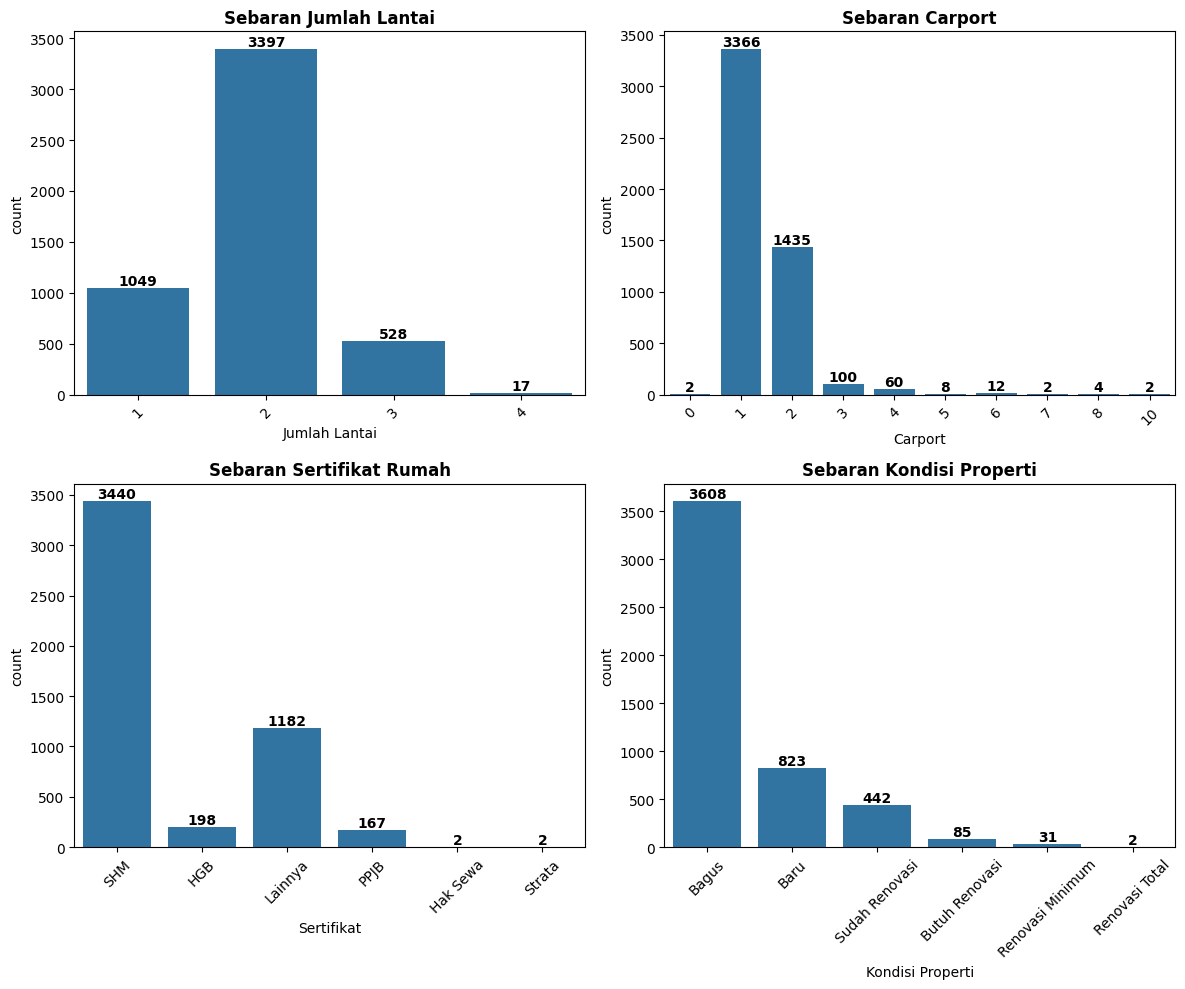

In [5]:
# Visualize some columns
# Creating a figure with 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of rows and columns
columns = ['Jumlah Lantai', 'Carport', 'Sertifikat', 'Kondisi Properti']
titles = ['Sebaran Jumlah Lantai', 'Sebaran Carport', 'Sebaran Sertifikat Rumah', 'Sebaran Kondisi Properti']

# Loop to create countplot and add the data label
for i, ax in enumerate(axes.flat):
    sns.countplot(x=df[columns[i]], ax=ax)
    ax.set_title(titles[i], weight='bold')

    # Add data label above the data bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
        
    # Rotate x label for 45 degree
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjusting the layouts
plt.tight_layout()
plt.show()

### Data Preparation

Before creating the ML model, here I will do the following process of Data Pre-processing:
1. Convert Data Types: <br>Cleaned and converted object/string columns into numeric types to make them suitable for mathematical operations.
2. Feature Extraction: <br>Extracted the district (Kecamatan) from the full Lokasi string to create a more structured and impactful categorical feature.
3. Filtering Data: <br>Filtered the dataset to eliminate anomaly.
4. Outliers Handling: <br>Capped extreme values in key numeric columns using the IQR method to prevent them from skewing the model's training process.
5. Encoding: <br>Transformed categorical features into a numerical format using One-Hot Encoding, allowing the machine learning models to process them.
6. Feature Selection: <br>Separated the data into predictor variables (X) and the target variable (y, Harga) in preparation for model training.
7. Data Splitting: <br>Divided the dataset into training (80%) and testing (20%) sets to ensure the model is evaluated on unseen data for an unbiased performance assessment.


#### Import helpers.py file

In [6]:
from src.utils.helpers import DataPreprocessor, Visualizer, DataAnalyzer

In [7]:
# Initialize classes
preprocessor = DataPreprocessor()
visualizer = Visualizer()
analyzer = DataAnalyzer()

#### Convert Data Types

In [8]:
# Clean 'Harga' column and convert data types into proper format
df['Harga'] = df['Harga'].apply(preprocessor.convert_price)
df = preprocessor.clean_numeric_columns(df)
df = preprocessor.clean_condition_column(df)

# Check the result on the top 5 rows of the dataset
df.head()

,Harga,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu
0,1000000000,"BSD, Tangerang",4,2,114,147,SHM,1300,2,Bagus,1,0,0
1,1000000000,"Tangerang, Tangerang",2,1,126,60,SHM,2200,1,Bagus,1,0,0
2,1000000000,"BSD City, Tangerang",3,2,84,81,HGB,1300,2,Bagus,1,0,0
3,1000000000,"BSD, Tangerang",3,2,103,66,SHM,1300,1,Bagus,1,0,0
4,1000000000,"BSD, Tangerang",3,2,103,66,SHM,1300,1,Bagus,1,0,0


In [9]:
# Check the data type is converted correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Harga                 4991 non-null   int64 
 1   Lokasi                4991 non-null   object
 2   Kamar Tidur           4991 non-null   Int64 
 3   Kamar Mandi           4991 non-null   Int64 
 4   Luas Tanah            4991 non-null   Int64 
 5   Luas Bangunan         4991 non-null   Int64 
 6   Sertifikat            4991 non-null   object
 7   Daya Listrik          4991 non-null   Int64 
 8   Jumlah Lantai         4991 non-null   Int64 
 9   Kondisi Properti      4991 non-null   object
 10  Carport               4991 non-null   Int64 
 11  Kamar Tidur Pembantu  4991 non-null   Int64 
 12  Kamar Mandi Pembantu  4991 non-null   Int64 
dtypes: Int64(9), int64(1), object(3)
memory usage: 550.9+ KB


In [10]:
# # Location check
# # Check if 'Lokasi' column is in the dataset
# if "Lokasi" in df.columns:
#     # Count the values of each location
#     lokasi_counts = df["Lokasi"].value_counts()
    
#     # Save the file in .txt format
#     file_path = "./data/processed/lokasi_counts.txt"
#     lokasi_counts.to_csv(file_path, sep="\t", header=True)

#     print(f"Results saved on: {file_path}")
# else:
#     print("'Lokasi' column can't be found on the dataset.")

#### Feature Extraction

In [11]:
# Extract subdistrict name from 'Lokasi' column
df['Kecamatan'] = df['Lokasi'].apply(preprocessor.extract_kecamatan)

# Exclude houses data that are not located in Tangerang Regency
df_kabupaten = preprocessor.filter_tangerang_regency(df)

# Check the top 5 rows of the dataset after subdistrict name extraction
df_kabupaten.head()

,Harga,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,Kamar Tidur Pembantu,Kamar Mandi Pembantu,Kecamatan
6,1000000000,2,1,90,55,SHM,2200,1,Bagus,1,0,0,Kelapa Dua
8,1000000000,2,1,90,55,SHM,2200,1,Bagus,1,0,0,Kelapa Dua
14,1000000000,3,2,644,135,SHM,1300,1,Bagus,1,0,0,Balaraja
15,1000000000,3,2,66,79,SHM,3500,2,Bagus,1,0,0,Pasar Kemis
21,1000000000,3,3,120,166,SHM,1300,2,Baru,2,1,0,Cikupa


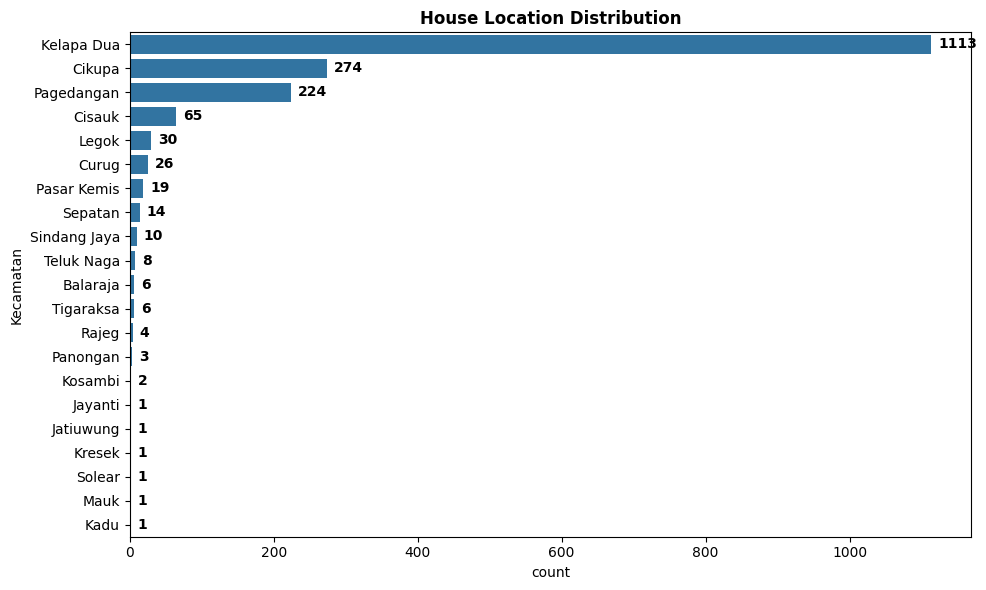

In [12]:
# View subdistrict distribution
visualizer.plot_location_distribution(df_kabupaten)

#### Filtering Data

In [13]:
# Filter the data to remove anomaly exists on the dataset.
df_kabupaten = preprocessor.apply_filters(df_kabupaten)

# Check the filter result
df_kabupaten.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1798 entries, 6 to 4990
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Harga                 1798 non-null   int64 
 1   Kamar Tidur           1798 non-null   Int64 
 2   Kamar Mandi           1798 non-null   Int64 
 3   Luas Tanah            1798 non-null   Int64 
 4   Luas Bangunan         1798 non-null   Int64 
 5   Sertifikat            1798 non-null   object
 6   Daya Listrik          1798 non-null   Int64 
 7   Jumlah Lantai         1798 non-null   Int64 
 8   Kondisi Properti      1798 non-null   object
 9   Carport               1798 non-null   Int64 
 10  Kamar Tidur Pembantu  1798 non-null   Int64 
 11  Kamar Mandi Pembantu  1798 non-null   Int64 
 12  Kecamatan             1798 non-null   object
dtypes: Int64(9), int64(1), object(3)
memory usage: 212.5+ KB


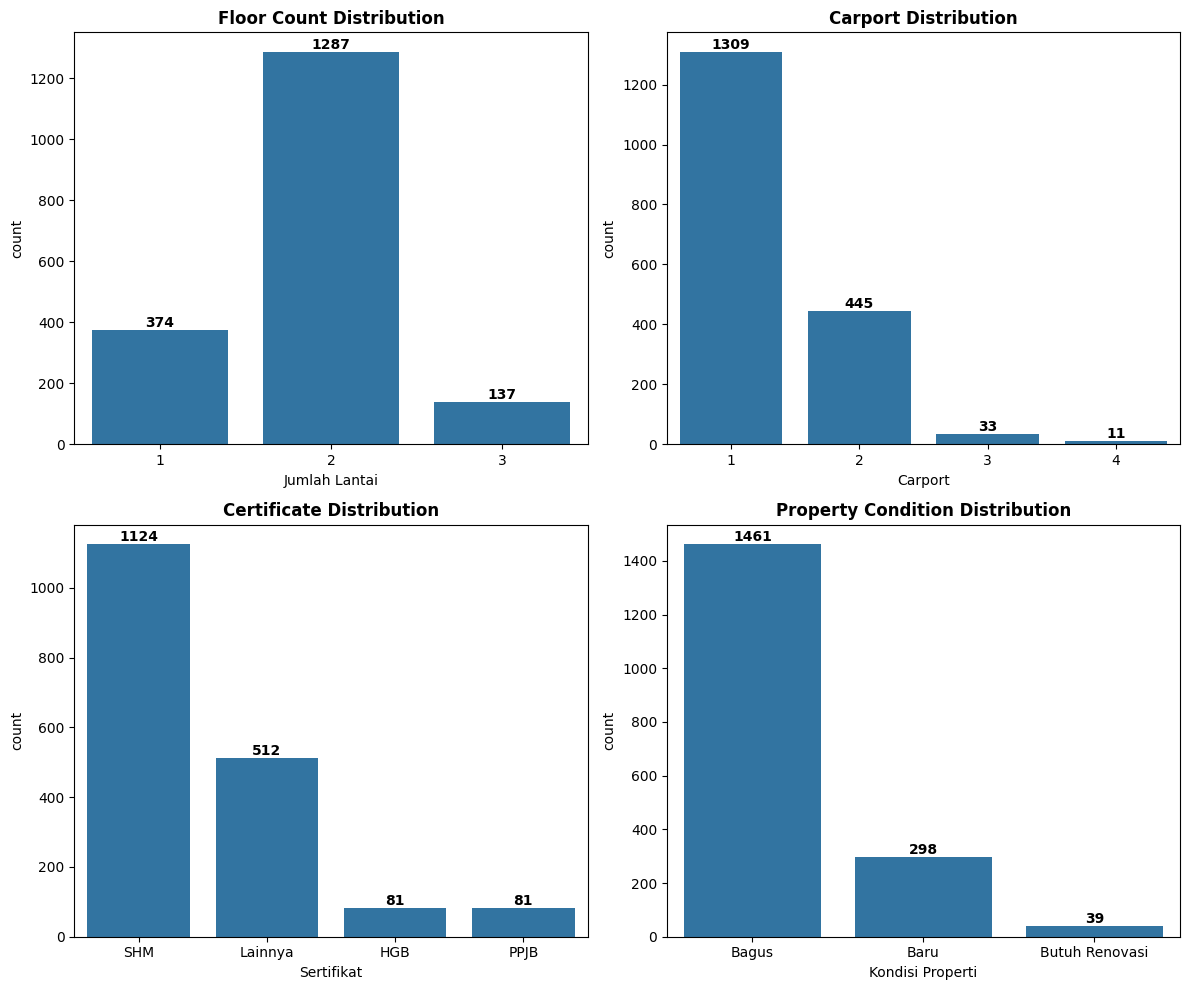

In [14]:
# Visualization of floor count distribution, carport distribution, certificate distribution, property condition distribution
visualizer.plot_categorical_distributions(df_kabupaten)

In [15]:
# Export Dataset for filter
# df_kabupaten.info()
# df_kabupaten.to_csv("../Dataset/Data Harga Rumah Kabupaten Tangerang.csv", index=False)

#### Encoding

In [16]:
# Encoding for categorical values.
df_encoded = preprocessor.encode_categorical_features(df_kabupaten)

# Check the encoded dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1798 entries, 6 to 4990
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Harga                 1798 non-null   int64  
 1   Kamar Tidur           1798 non-null   Int64  
 2   Kamar Mandi           1798 non-null   Int64  
 3   Luas Tanah            1798 non-null   Int64  
 4   Luas Bangunan         1798 non-null   Int64  
 5   Sertifikat            1798 non-null   float64
 6   Daya Listrik          1798 non-null   float64
 7   Jumlah Lantai         1798 non-null   Int64  
 8   Kondisi Properti      1798 non-null   float64
 9   Carport               1798 non-null   Int64  
 10  Kamar Tidur Pembantu  1798 non-null   Int64  
 11  Kamar Mandi Pembantu  1798 non-null   Int64  
 12  kec_Balaraja          1798 non-null   bool   
 13  kec_Cikupa            1798 non-null   bool   
 14  kec_Cisauk            1798 non-null   bool   
 15  kec_Curug             1798

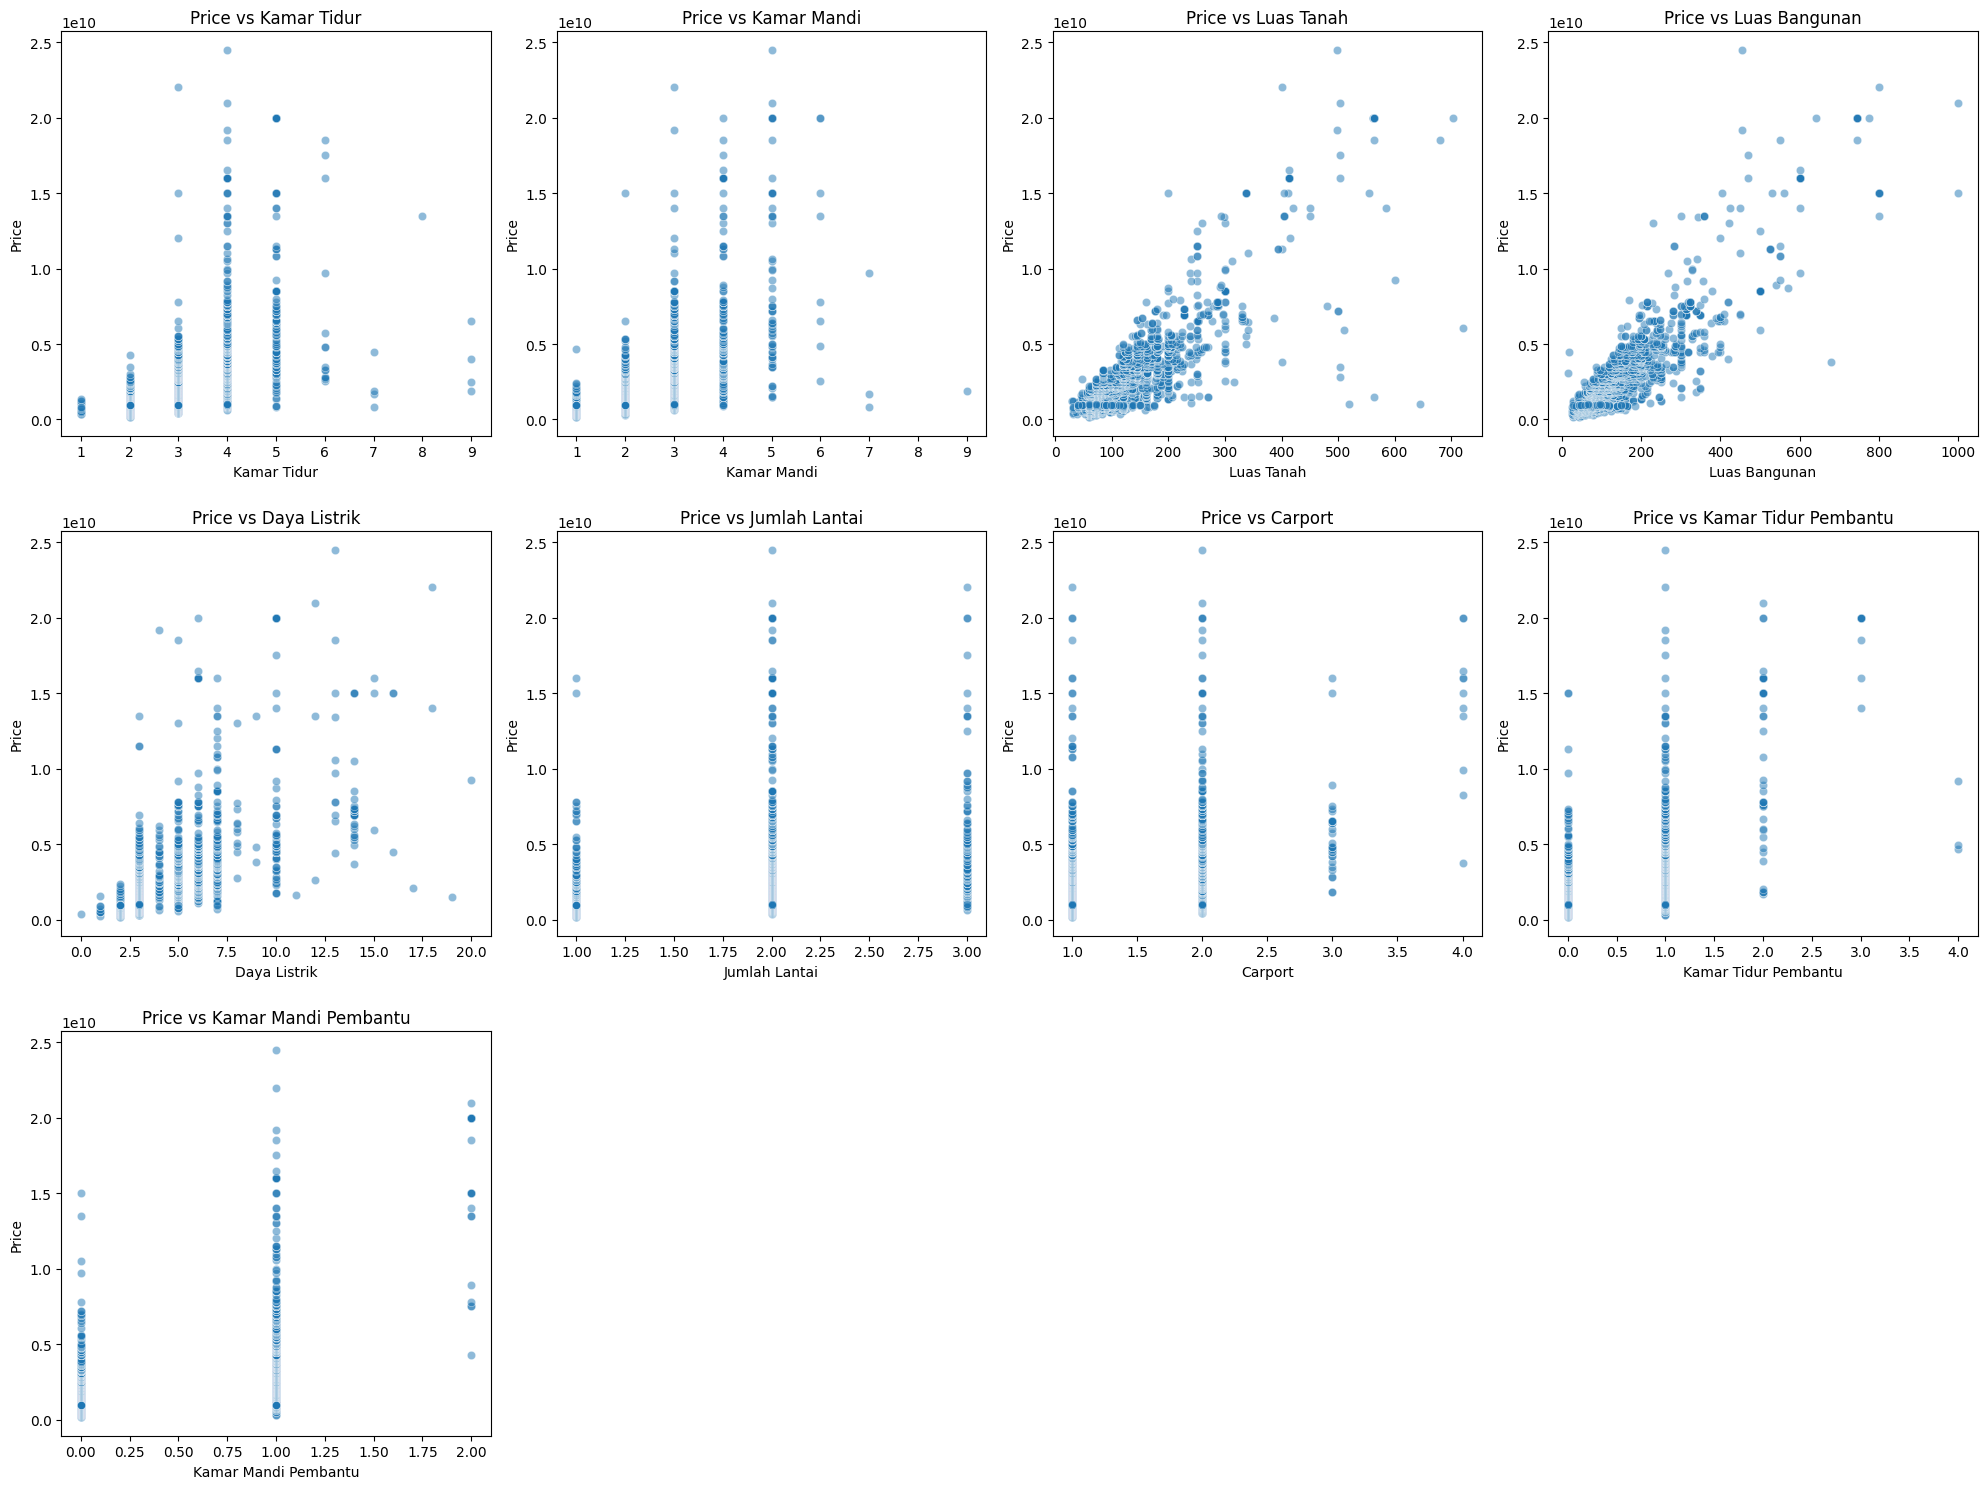

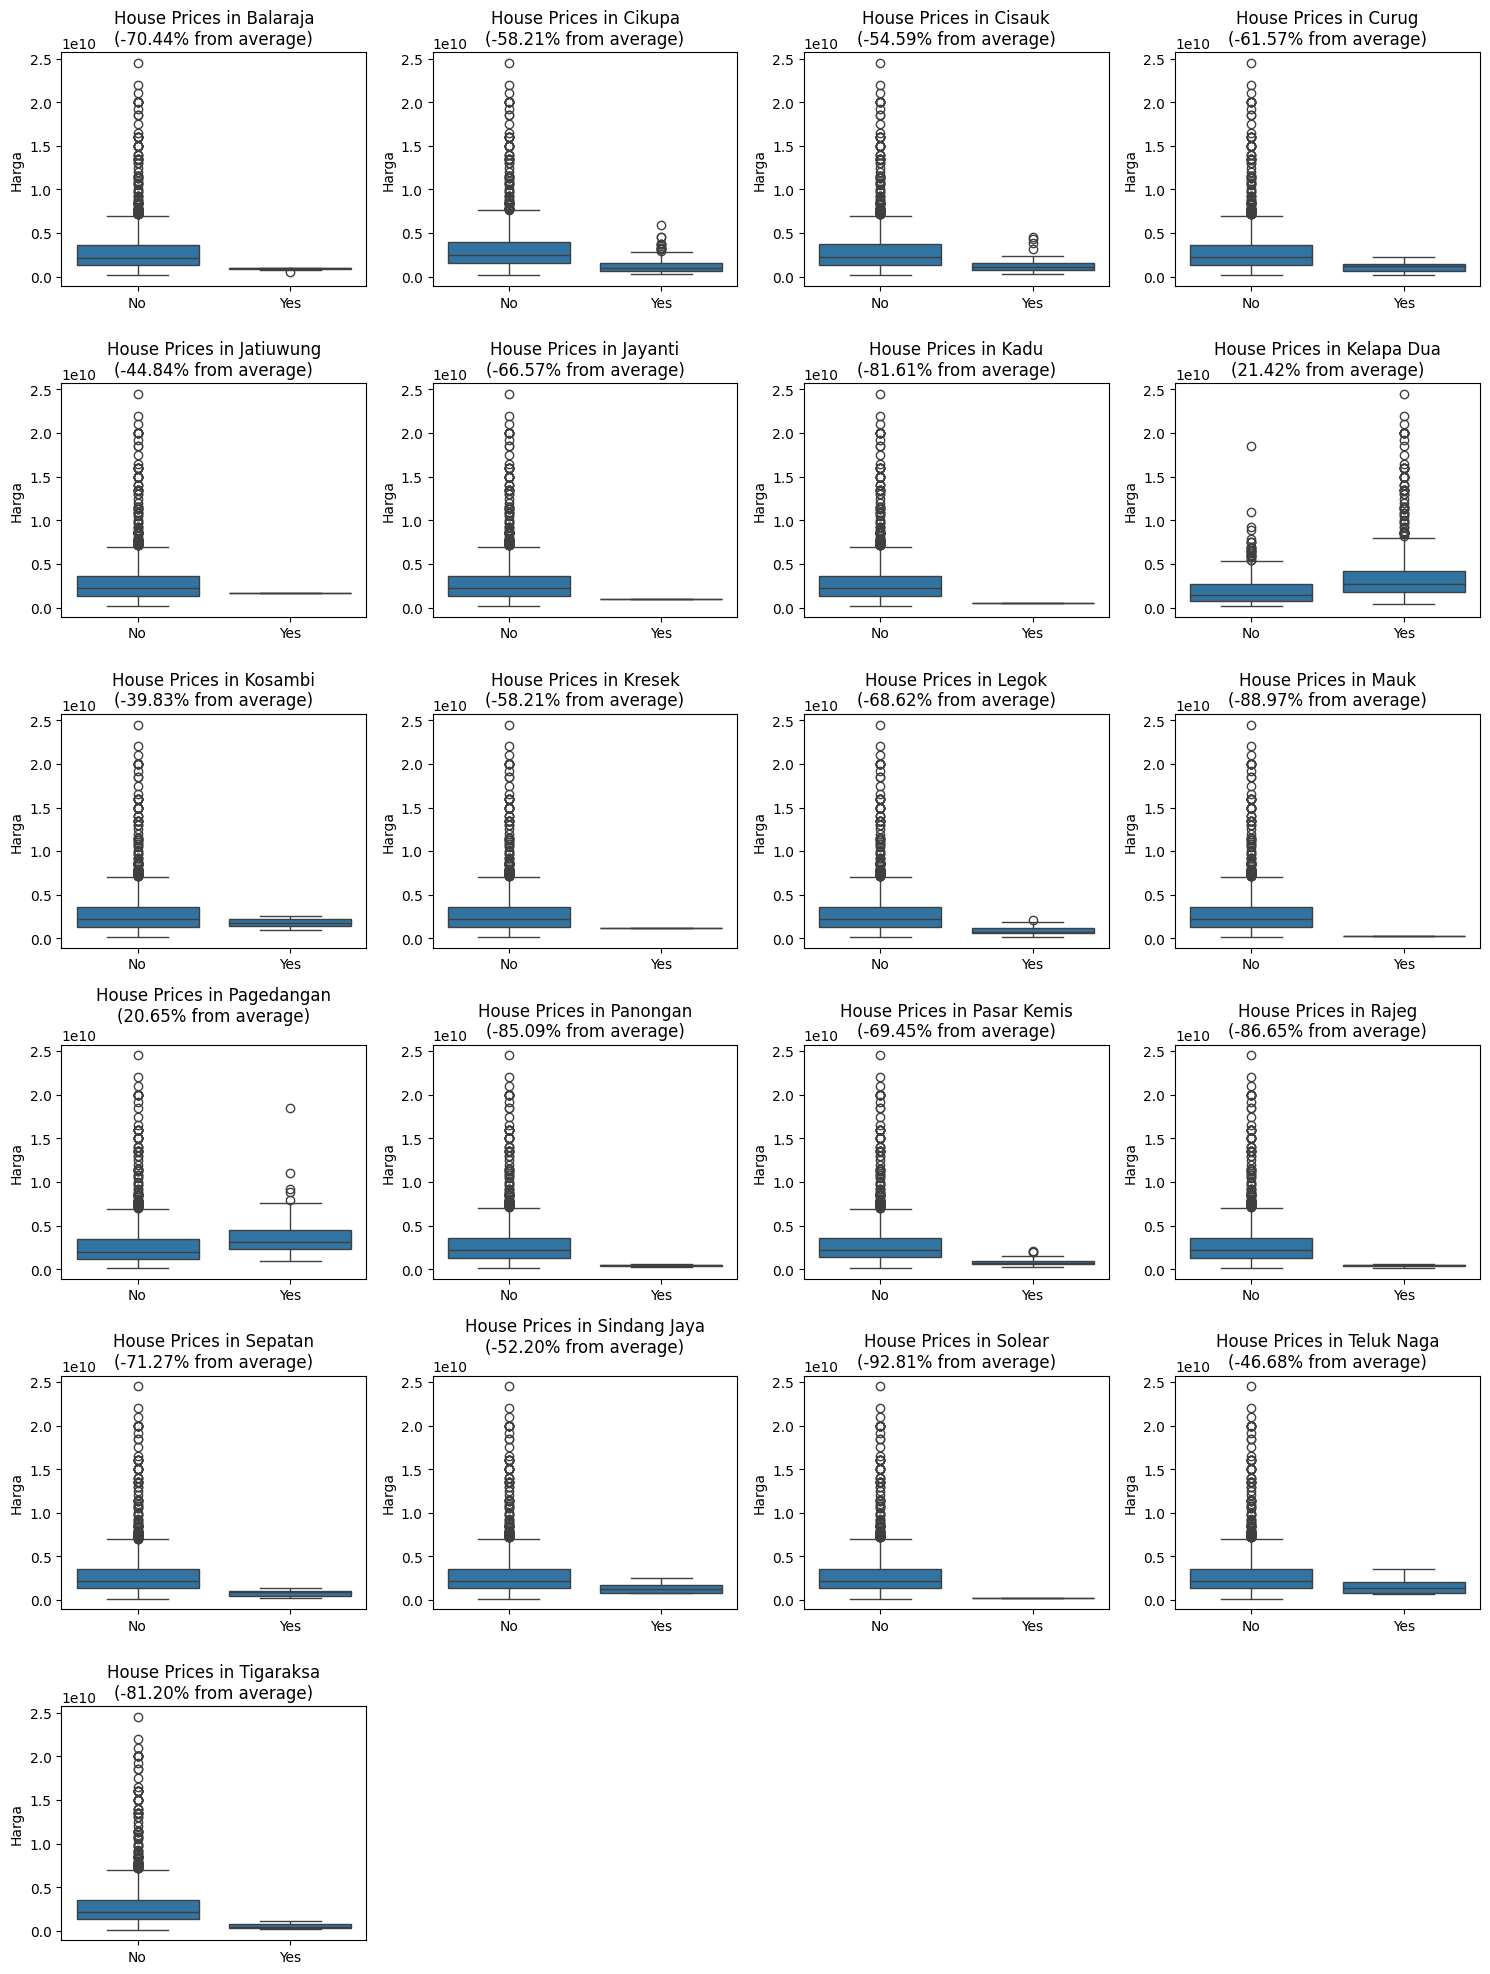

Overall average price: 2,991,479,421.57


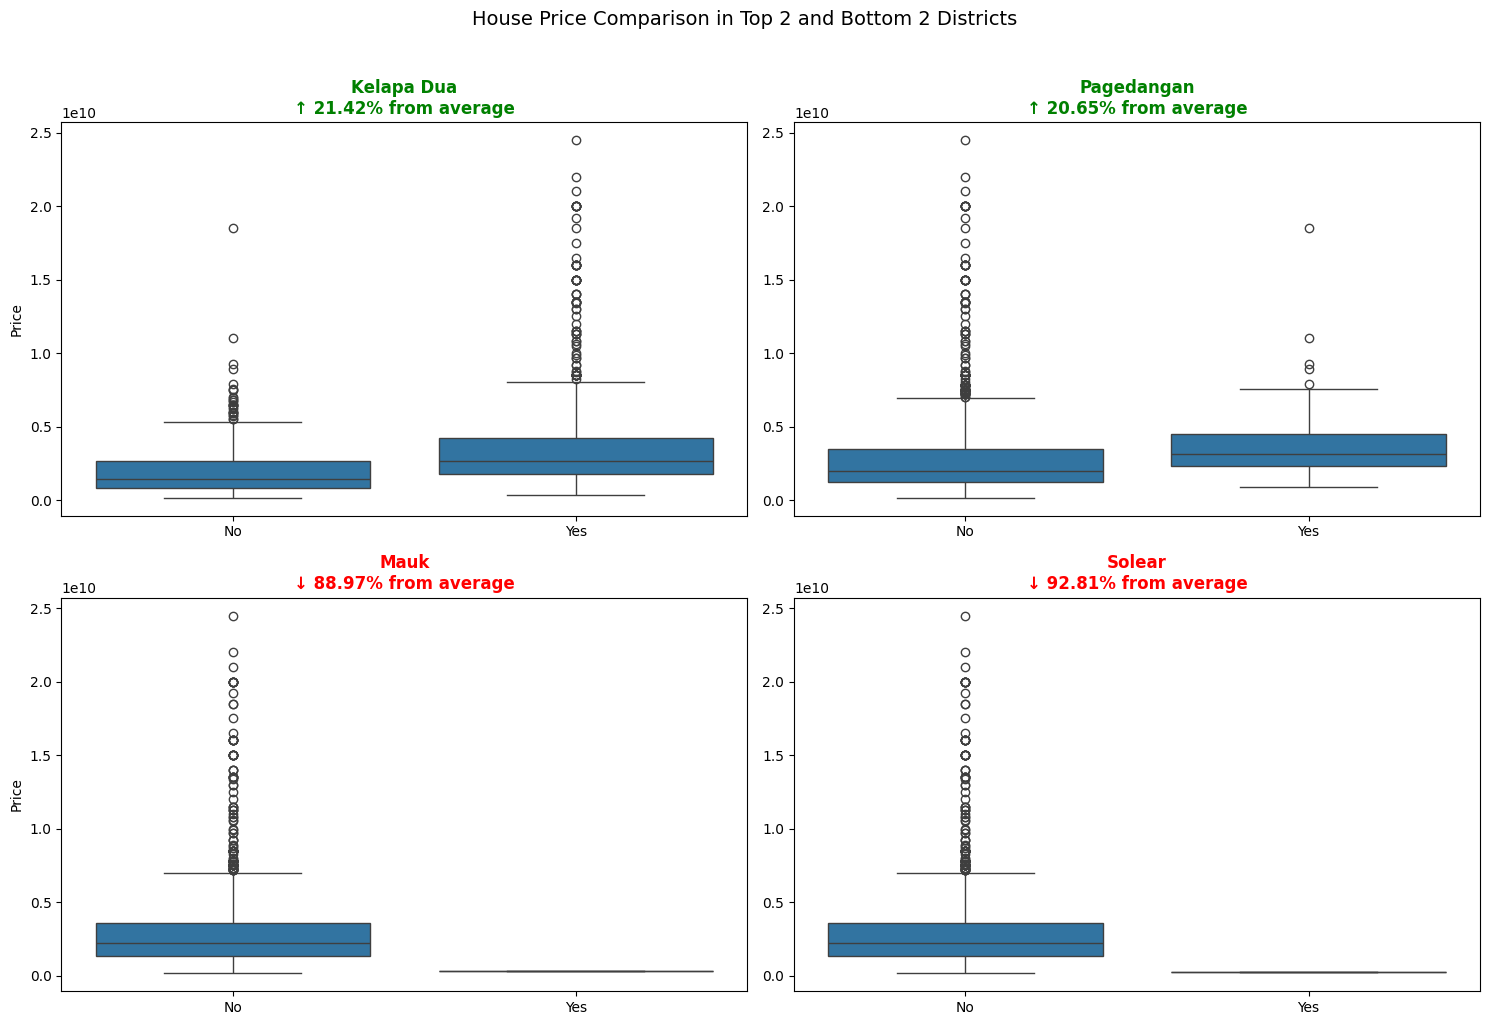

,kecamatan,avg_price,pct_diff
18,Solear,"Rp 215,000,000",-92.81%
11,Mauk,"Rp 330,000,000",-88.97%
7,Kelapa Dua,"Rp 3,632,154,125",+21.42%
12,Pagedangan,"Rp 3,609,285,714",+20.65%


In [17]:
# Price vs Numerical vars scatter plot
excluded_columns = ['Harga']
numerical_vars = [col for col in df_kabupaten.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_columns]
visualizer.plot_numeric_vs_price(df_encoded, numerical_vars)

# Boxplot of house price in each subdistrict
visualizer.plot_all_kecamatan_boxplots(df_encoded)

# Comparison between the top and bottom subdistrict houses
visualizer.plot_kecamatan_price_comparison(df_encoded)

#### Outliers Handling

Outliers in the Harga column were capped using the IQR method to prevent extreme values from skewing the model's performance. This is preferred over removal to retain as much data as possible.

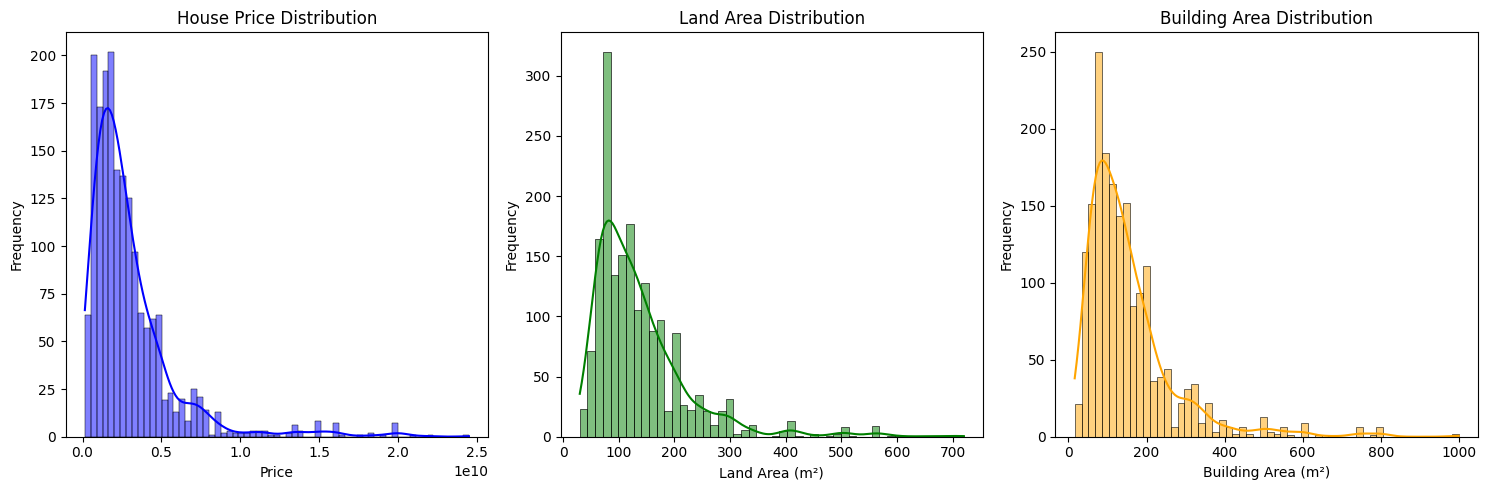

In [18]:
# Check the initial distribution of 'Harga', 'Luas Tanah', 'Luas Bangunan' columns
visualizer.plot_price_distributions(df_encoded)

In [19]:
# Check skewness of each column
analyzer.calculate_skewness(df_encoded)

Skewness of the 'Harga' column distribution:  3.08
Skewness of the 'Luas Tanah' column distribution:   2.4
Skewness of the 'Luas Bangunan' column distribution:  2.63


{'Harga': np.float64(3.08),
 'Luas Tanah': np.float64(2.4),
 'Luas Bangunan': np.float64(2.63)}

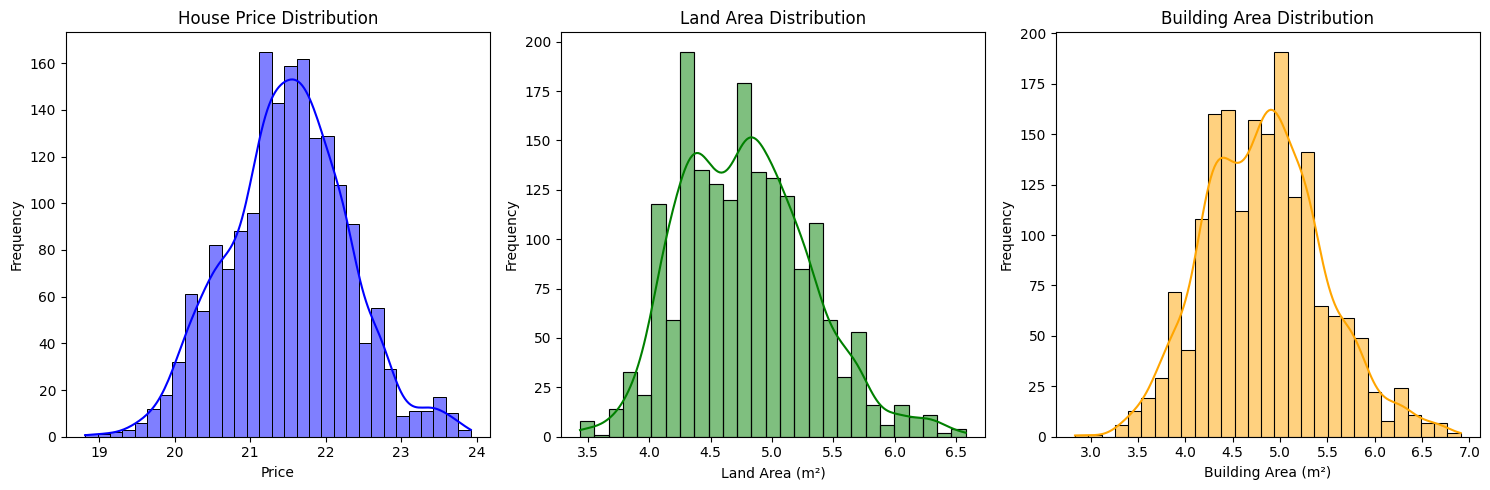

In [20]:
# Log transformation
df_final = preprocessor.apply_log_transformation(df_encoded)

# See the result of log transformation
visualizer.plot_price_distributions(df_final)

#### Feature Selection

Using pearson correlation.

In [21]:
# Pearson correlation analysis for feature selection
corr_analysis = analyzer.analyze_correlations(df_final)
print("Strong correlations:", corr_analysis['strong_correlation_vars'])

Strong correlations: ['Luas Bangunan', 'Luas Tanah', 'Kamar Mandi', 'Daya Listrik', 'Kamar Tidur', 'Kamar Mandi Pembantu', 'Kamar Tidur Pembantu', 'Jumlah Lantai', 'Carport']


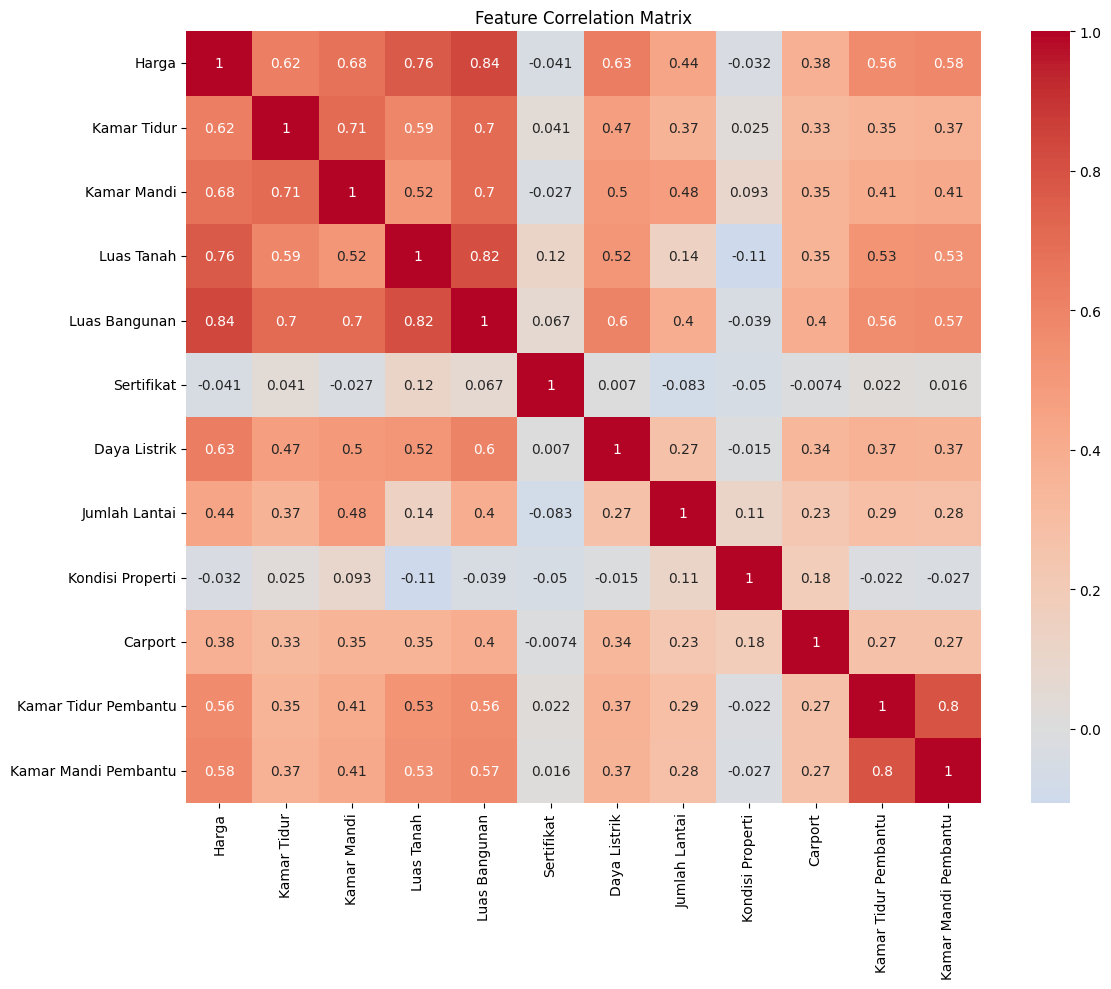

In [22]:
# Check the correlation heatmap
visualizer.plot_correlation_heatmap(df_final)

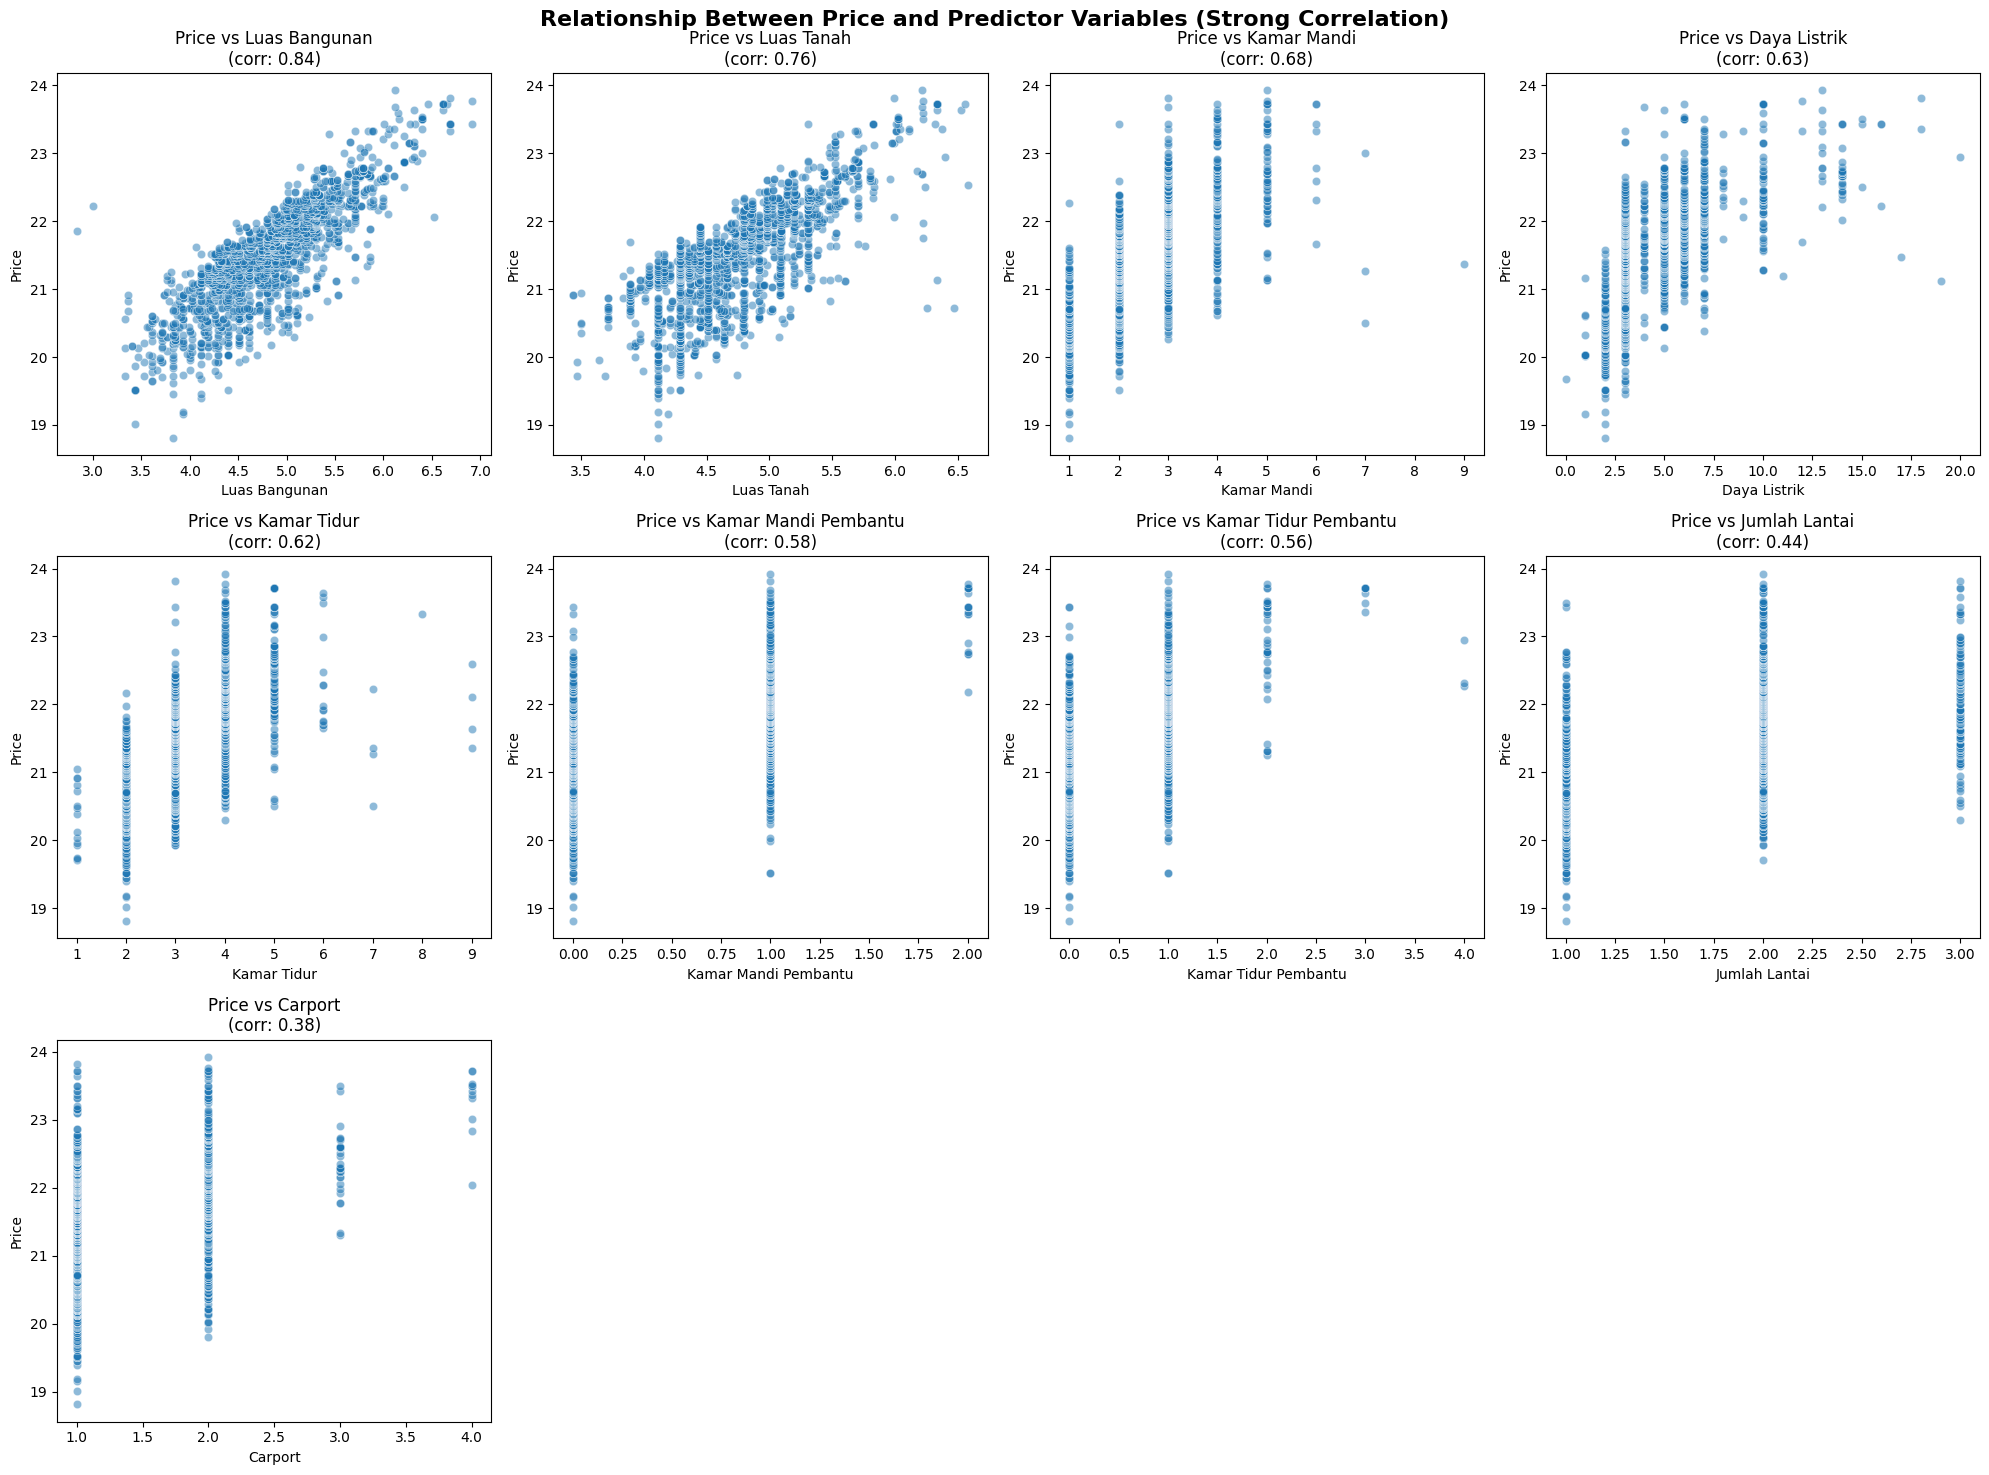

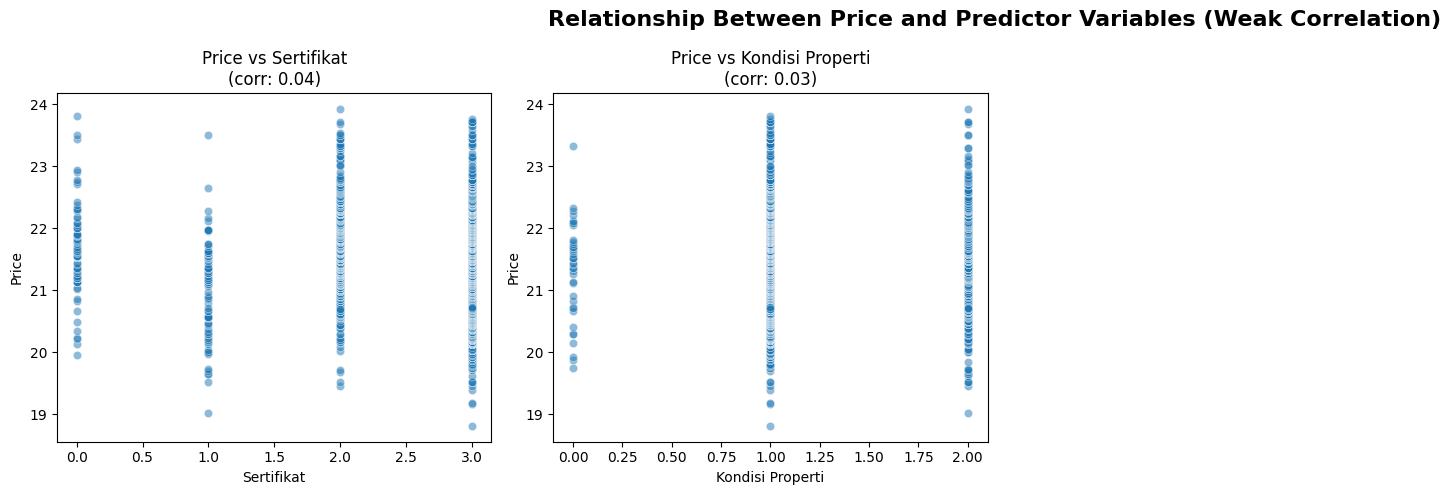

Strong correlation variables: ['Luas Bangunan', 'Luas Tanah', 'Kamar Mandi', 'Daya Listrik', 'Kamar Tidur', 'Kamar Mandi Pembantu', 'Kamar Tidur Pembantu', 'Jumlah Lantai', 'Carport']
Weak correlation variables: ['Sertifikat', 'Kondisi Properti']
All correlations: Luas Bangunan           0.838479
Luas Tanah              0.762454
Kamar Mandi             0.678993
Daya Listrik            0.631578
Kamar Tidur             0.623999
Kamar Mandi Pembantu    0.580251
Kamar Tidur Pembantu    0.564324
Jumlah Lantai           0.440478
Carport                 0.376543
Sertifikat              0.041082
Kondisi Properti        0.031863
dtype: float64


In [23]:
corr_results = visualizer.plot_correlation_scatter_grids(df_final)

# Access the results
print("Strong correlation variables:", corr_results['strong_correlation_vars'])
print("Weak correlation variables:", corr_results['weak_correlation_vars'])
print("All correlations:", corr_results['correlations'])

In [24]:
# Check the final dataset before continue to the next part
df_final.head()

,Harga,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,Jumlah Lantai,Kondisi Properti,Carport,...,kec_Mauk,kec_Pagedangan,kec_Panongan,kec_Pasar Kemis,kec_Rajeg,kec_Sepatan,kec_Sindang Jaya,kec_Solear,kec_Teluk Naga,kec_Tigaraksa
6,20.723266,2,1,4.51086,4.025352,3.0,3.0,1,1.0,1,...,False,False,False,False,False,False,False,False,False,False
8,20.723266,2,1,4.51086,4.025352,3.0,3.0,1,1.0,1,...,False,False,False,False,False,False,False,False,False,False
14,20.723266,3,2,6.46925,4.912655,3.0,2.0,1,1.0,1,...,False,False,False,False,False,False,False,False,False,False
15,20.723266,3,2,4.204693,4.382027,3.0,5.0,2,1.0,1,...,False,False,False,True,False,False,False,False,False,False
21,20.723266,3,3,4.795791,5.117994,3.0,2.0,2,2.0,2,...,False,False,False,False,False,False,False,False,False,False


#### Data Splitting
Drop the 'Sertifikat' and 'Kondisi Properti' columns due to low correlation values (close to 0).

In [25]:
# Separate features and targets
X = df_final.drop(columns=['Harga', 'Sertifikat', 'Kondisi Properti'], axis=1)
y = df_final['Harga']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# View predictor variable information
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1798 entries, 6 to 4990
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kamar Tidur           1798 non-null   Int64  
 1   Kamar Mandi           1798 non-null   Int64  
 2   Luas Tanah            1798 non-null   Float64
 3   Luas Bangunan         1798 non-null   Float64
 4   Daya Listrik          1798 non-null   float64
 5   Jumlah Lantai         1798 non-null   Int64  
 6   Carport               1798 non-null   Int64  
 7   Kamar Tidur Pembantu  1798 non-null   Int64  
 8   Kamar Mandi Pembantu  1798 non-null   Int64  
 9   kec_Balaraja          1798 non-null   bool   
 10  kec_Cikupa            1798 non-null   bool   
 11  kec_Cisauk            1798 non-null   bool   
 12  kec_Curug             1798 non-null   bool   
 13  kec_Jatiuwung         1798 non-null   bool   
 14  kec_Jayanti           1798 non-null   bool   
 15  kec_Kadu              1798

### Modeling & Evaluation

ML algorithm used:
1. Multiple Linear Regression (MLR) as base model
2. Random Forest
3. XGBoost
4. Random Forest with Optuna hyperparameter-tuned
5. XGBoost with Optuna hyperparameter-tuned

In [27]:
from src.utils.helpers import ModelEvaluator

# Initialize evaluator
evaluator = ModelEvaluator()

#### Evaluate Base Model (MLR, RF, XGB)

In [28]:
print("🔍 EVALUATING BASE MODELS")
print("=" * 50)

all_metrics = []

# Linear Regression
print("Training Linear Regression...")
lr_metrics = evaluator.evaluate_model(
    LinearRegression(), 
    X_train, y_train, X_test, y_test, 
    "Linear Regression"
)
all_metrics.append(lr_metrics)

# Random Forest
print("Training Random Forest...")
rf_metrics = evaluator.evaluate_model(
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    X_train, y_train, X_test, y_test,
    "Random Forest"
)
all_metrics.append(rf_metrics)

# XGBoost
print("Training XGBoost...")
xgb_metrics = evaluator.evaluate_model(
    XGBRegressor(random_state=42, n_jobs=-1),
    X_train, y_train, X_test, y_test,
    "XGBoost"
)
all_metrics.append(xgb_metrics)

🔍 EVALUATING BASE MODELS
Training Linear Regression...
Training Random Forest...
Training XGBoost...


#### Optuna Hyperparameter-tuning (RF-Optuna, XGB-Optuna)

In [29]:
print("\n🎯 HYPERPARAMETER TUNING WITH OPTUNA")
print("=" * 50)

# 1. Tune Random Forest
print("Tuning Random Forest (this may take a while)...")
rf_best_params, rf_study = evaluator.tune_with_optuna(
    'Random Forest', 
    X_train, y_train, 
    n_trials=100  # You control the iterations here!
)

# 2. Tune XGBoost
print("\nTuning XGBoost (this may take a while)...")
xgb_best_params, xgb_study = evaluator.tune_with_optuna(
    'XGBoost',
    X_train, y_train,
    n_trials=100  # You control the iterations here!
)

[I 2025-09-29 16:41:19,789] A new study created in memory with name: no-name-0ee89530-adc1-4aec-9401-bc0bdb2ac4aa



🎯 HYPERPARAMETER TUNING WITH OPTUNA
Tuning Random Forest (this may take a while)...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-09-29 16:41:23,009] Trial 0 finished with value: 0.8826341379316618 and parameters: {'n_estimators': 1500, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.44115049913173293, 'max_samples': 0.9094882112295944, 'ccp_alpha': 0.0003586925146214032}. Best is trial 0 with value: 0.8826341379316618.
[I 2025-09-29 16:41:26,603] Trial 1 finished with value: 0.8744474259528919 and parameters: {'n_estimators': 1600, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.45552276983633794, 'max_samples': 0.8311035874567623, 'ccp_alpha': 0.0011797126886070718}. Best is trial 0 with value: 0.8826341379316618.
[I 2025-09-29 16:41:31,260] Trial 2 finished with value: 0.8379902853135661 and parameters: {'n_estimators': 2000, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.692295227615483, 'max_samples': 0.9410066179466128, 'ccp_alpha': 0.0044339123056479504}. Best is trial 0 with value: 0.882634137931

[I 2025-09-29 16:47:49,468] A new study created in memory with name: no-name-88e91f46-4633-4f17-89fd-1cb06fb8ba2c


[I 2025-09-29 16:47:49,465] Trial 99 finished with value: 0.8877938783152484 and parameters: {'n_estimators': 1900, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.570770388556502, 'max_samples': 0.9392968219724912, 'ccp_alpha': 0.0005567301317811854}. Best is trial 35 with value: 0.9008248189169793.
Best hyperparameters for Random Forest: {'n_estimators': 1600, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.5087626319188686, 'max_samples': 0.9396111172613139, 'ccp_alpha': 5.112798022341066e-05}

Tuning XGBoost (this may take a while)...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-09-29 16:47:50,017] Trial 0 finished with value: 0.8626675435088884 and parameters: {'n_estimators': 1700, 'learning_rate': 0.013429569958385934, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.9660951940198308, 'colsample_bytree': 0.825324392041793, 'gamma': 2.582914424178577, 'reg_alpha': 2.2329547924681776, 'reg_lambda': 4.518257858621544}. Best is trial 0 with value: 0.8626675435088884.
[I 2025-09-29 16:47:50,441] Trial 1 finished with value: 0.8691617941969401 and parameters: {'n_estimators': 1300, 'learning_rate': 0.011746959064268887, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.9443259494278546, 'colsample_bytree': 0.7538023151195409, 'gamma': 1.5057373423567353, 'reg_alpha': 3.3766488105916745, 'reg_lambda': 4.9845220340653285}. Best is trial 1 with value: 0.8691617941969401.
[I 2025-09-29 16:47:50,823] Trial 2 finished with value: 0.8618399751840398 and parameters: {'n_estimators': 1200, 'learning_rate': 0.014035697463673879, 'max_depth': 6, 'min_child_

#### Evaluate Optuna-tuned Model (RF-Optuna, XGB-Optuna)

In [30]:
print("\n📊 EVALUATING TUNED MODELS")
print("=" * 50)

# 1. Evaluate Tuned Random Forest
print("Evaluating Tuned Random Forest...")
rf_tuned_metrics = evaluator.evaluate_model(
    RandomForestRegressor(**rf_best_params, random_state=42, n_jobs=-1),
    X_train, y_train, X_test, y_test,
    "Random Forest (Optuna)"
)
all_metrics.append(rf_tuned_metrics)

# 2. Evaluate Tuned XGBoost
print("Evaluating Tuned XGBoost...")
xgb_tuned_metrics = evaluator.evaluate_model(
    XGBRegressor(**xgb_best_params, random_state=42, n_jobs=-1),
    X_train, y_train, X_test, y_test,
    "XGBoost (Optuna)"
)
all_metrics.append(xgb_tuned_metrics)


📊 EVALUATING TUNED MODELS
Evaluating Tuned Random Forest...
Evaluating Tuned XGBoost...


#### Comprehensive Results

In [37]:
print("\n📈 COMPREHENSIVE MODEL RESULTS")
print("=" * 50)

results_df, styled_results = evaluator.create_results_table(all_metrics)
display(styled_results)


📈 COMPREHENSIVE MODEL RESULTS


ValueError: too many values to unpack (expected 2)


📊 MODEL VISUALIZATIONS
Plotting convergence graphs...


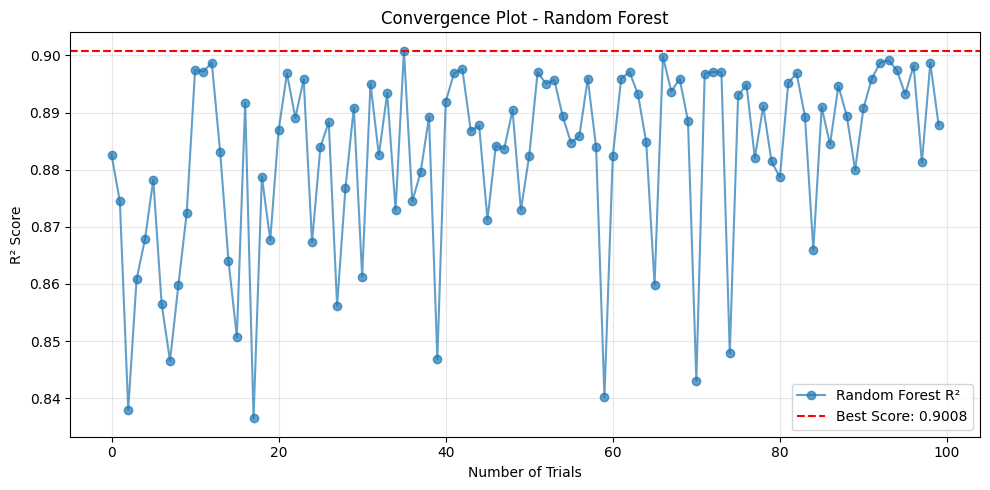

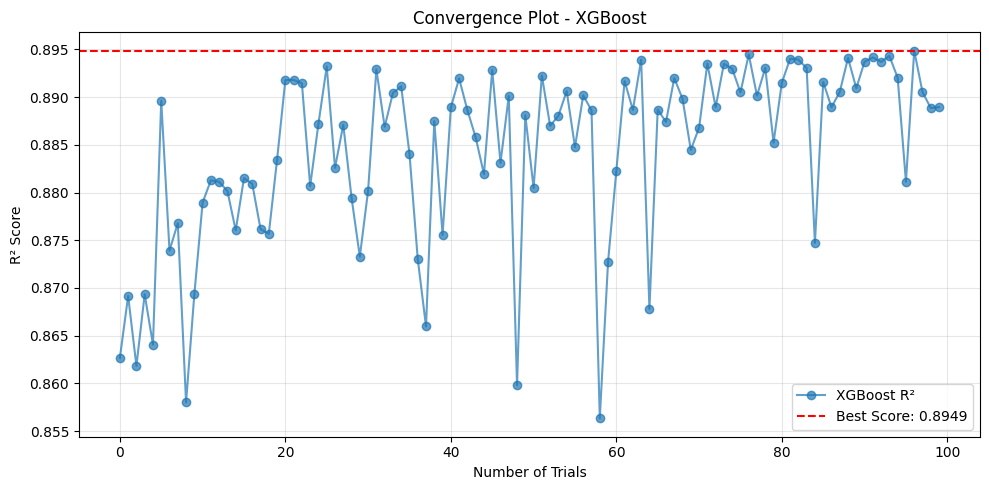

Plotting learning curves...


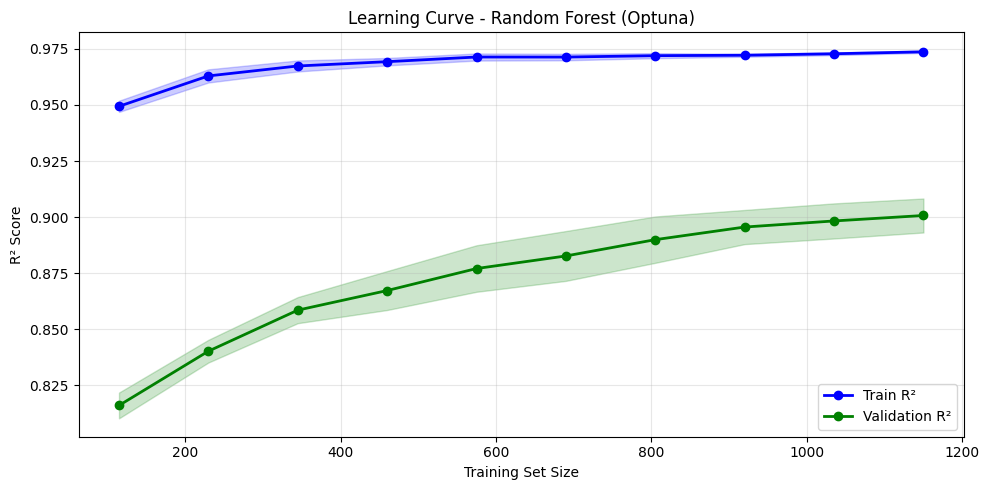

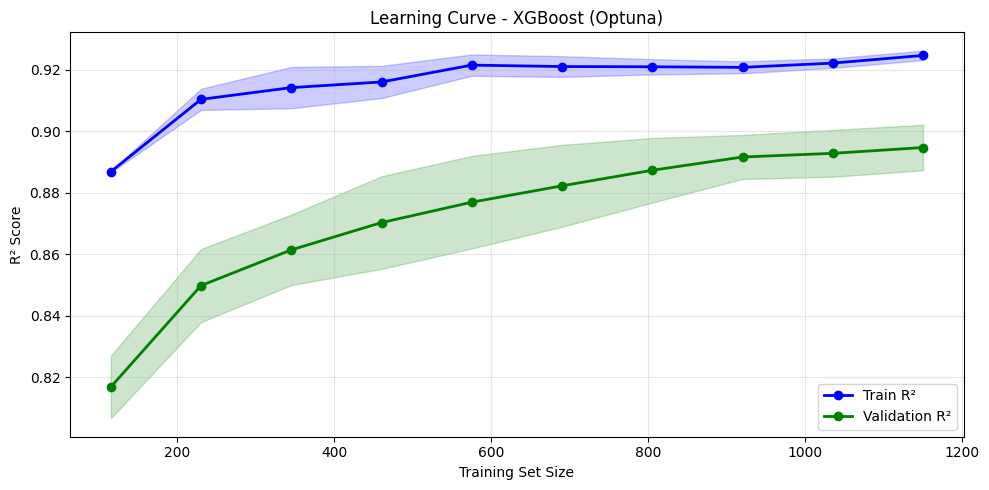

In [32]:
# === VISUALIZATIONS ===
print("\n📊 MODEL VISUALIZATIONS")
print("=" * 50)

# 1. Convergence Plots
print("Plotting convergence graphs...")
evaluator.plot_convergence(rf_study, "Random Forest")
evaluator.plot_convergence(xgb_study, "XGBoost")

# 2. Learning Curves
print("Plotting learning curves...")
best_rf_model = RandomForestRegressor(**rf_best_params, random_state=42, n_jobs=-1)
best_xgb_model = XGBRegressor(**xgb_best_params, random_state=42, n_jobs=-1)

evaluator.plot_learning_curve(best_rf_model, X_train, y_train, "Random Forest (Optuna)")
evaluator.plot_learning_curve(best_xgb_model, X_train, y_train, "XGBoost (Optuna)")


🔍 PREDICTION ANALYSIS
Plotting prediction comparisons...


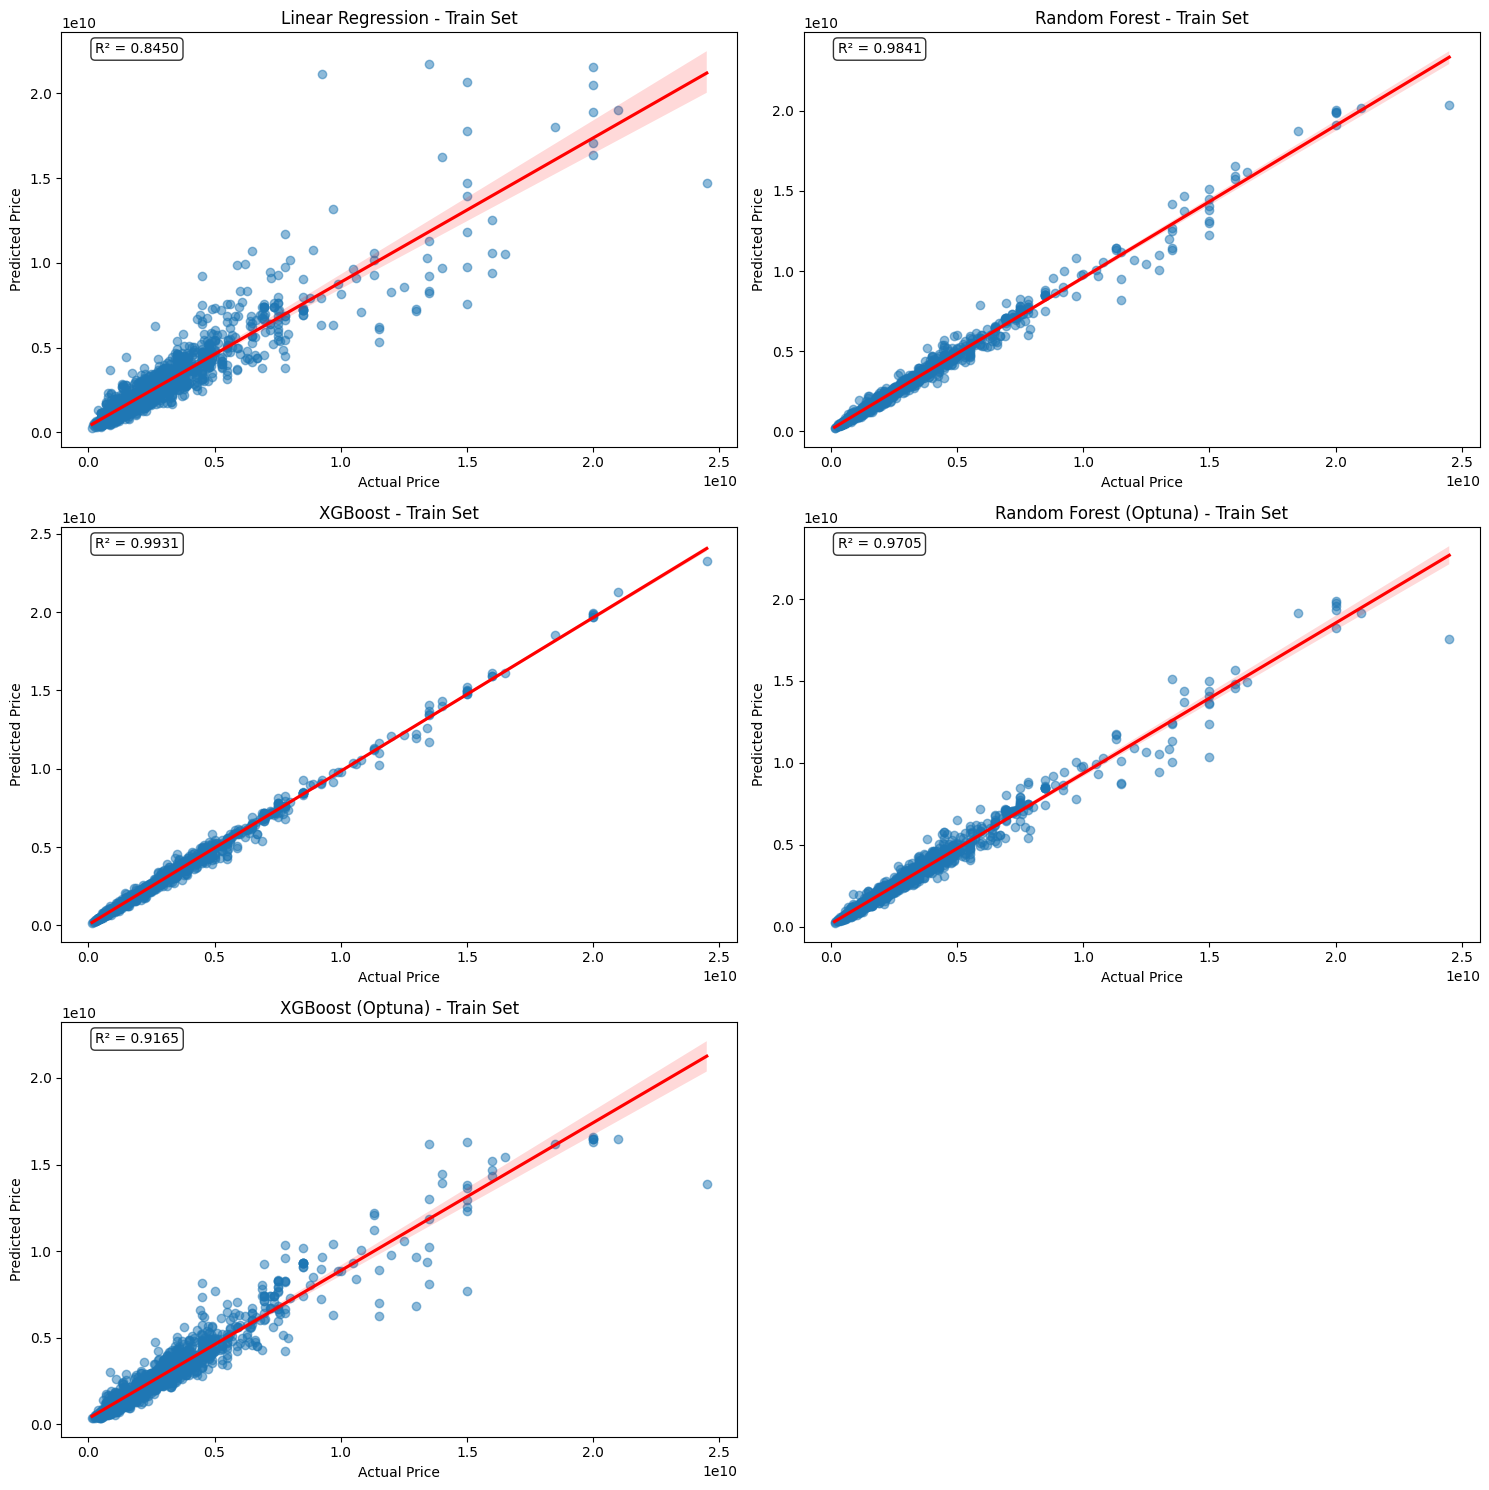

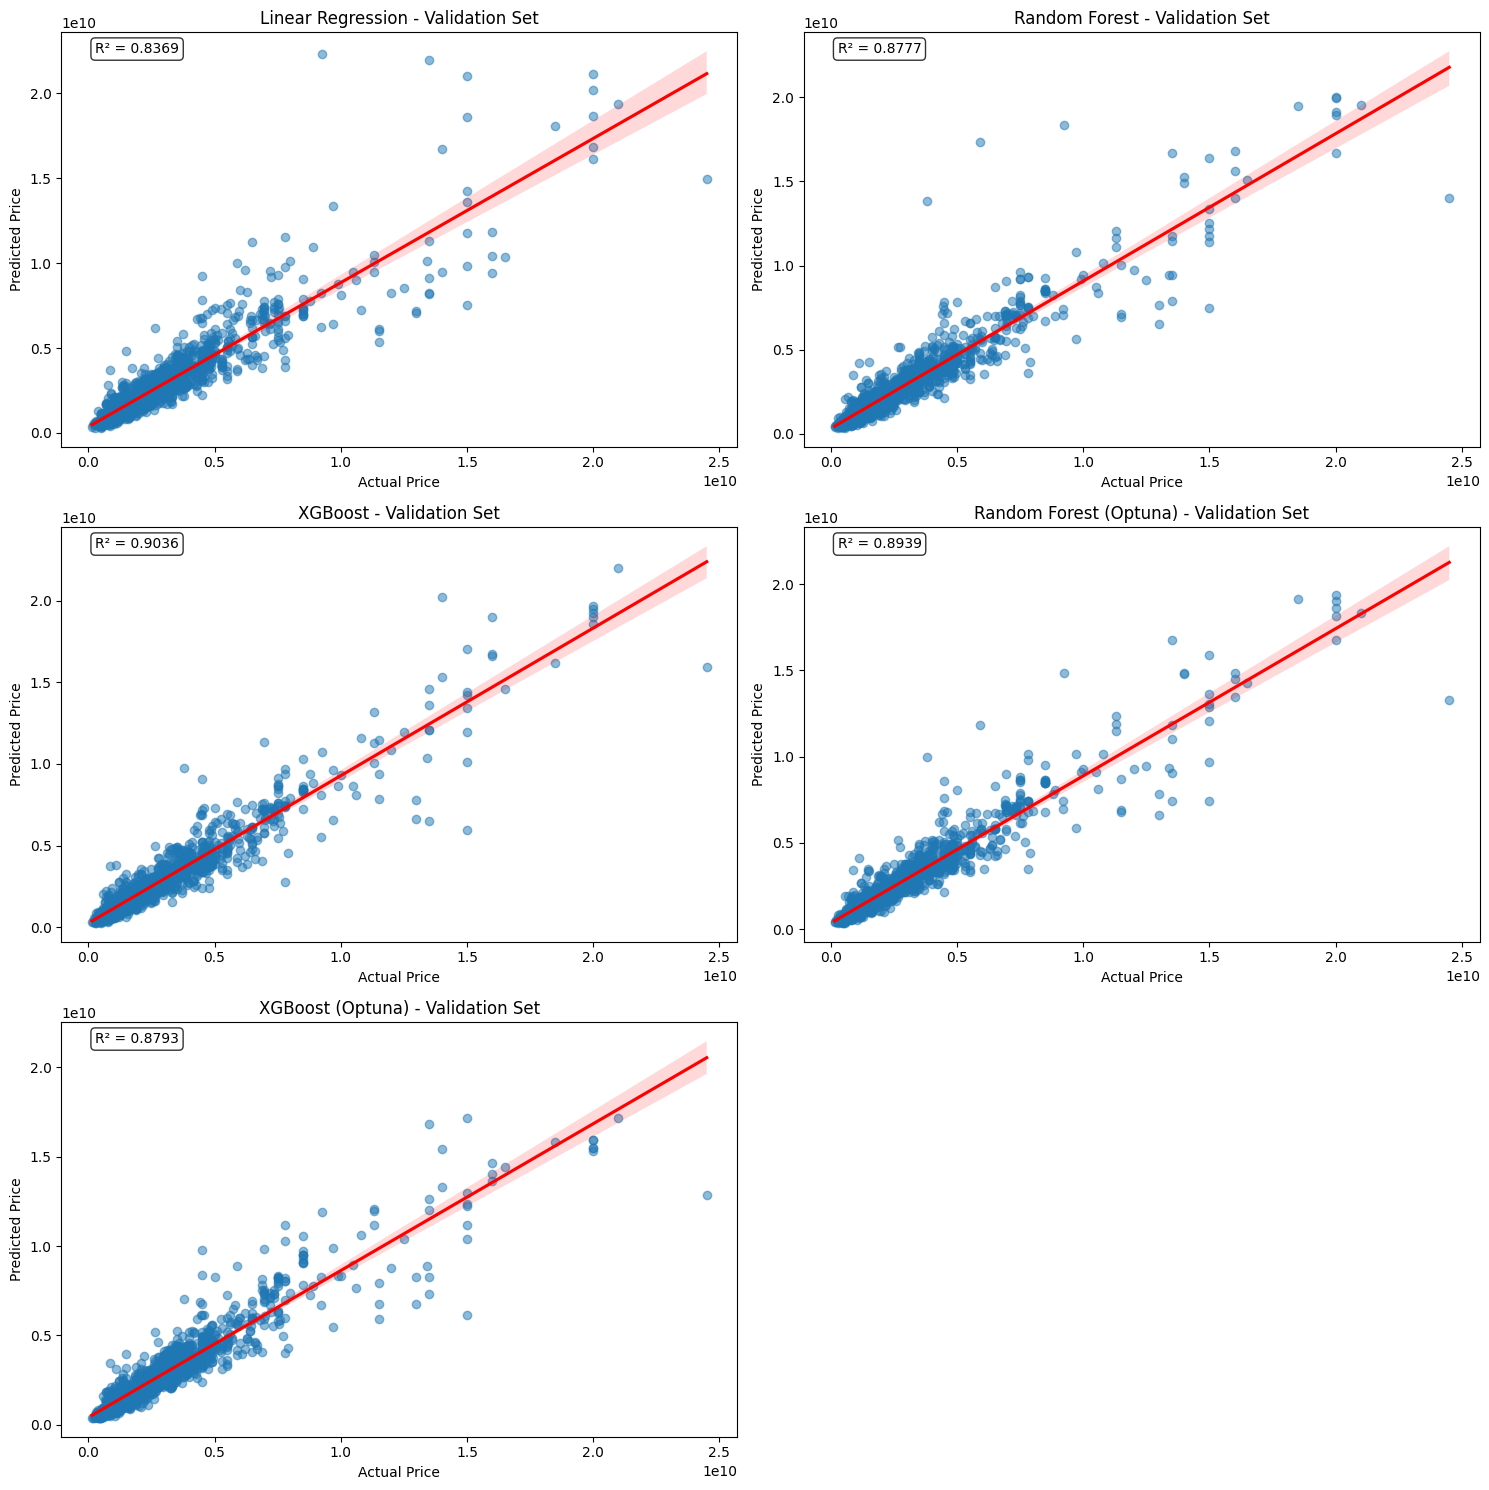

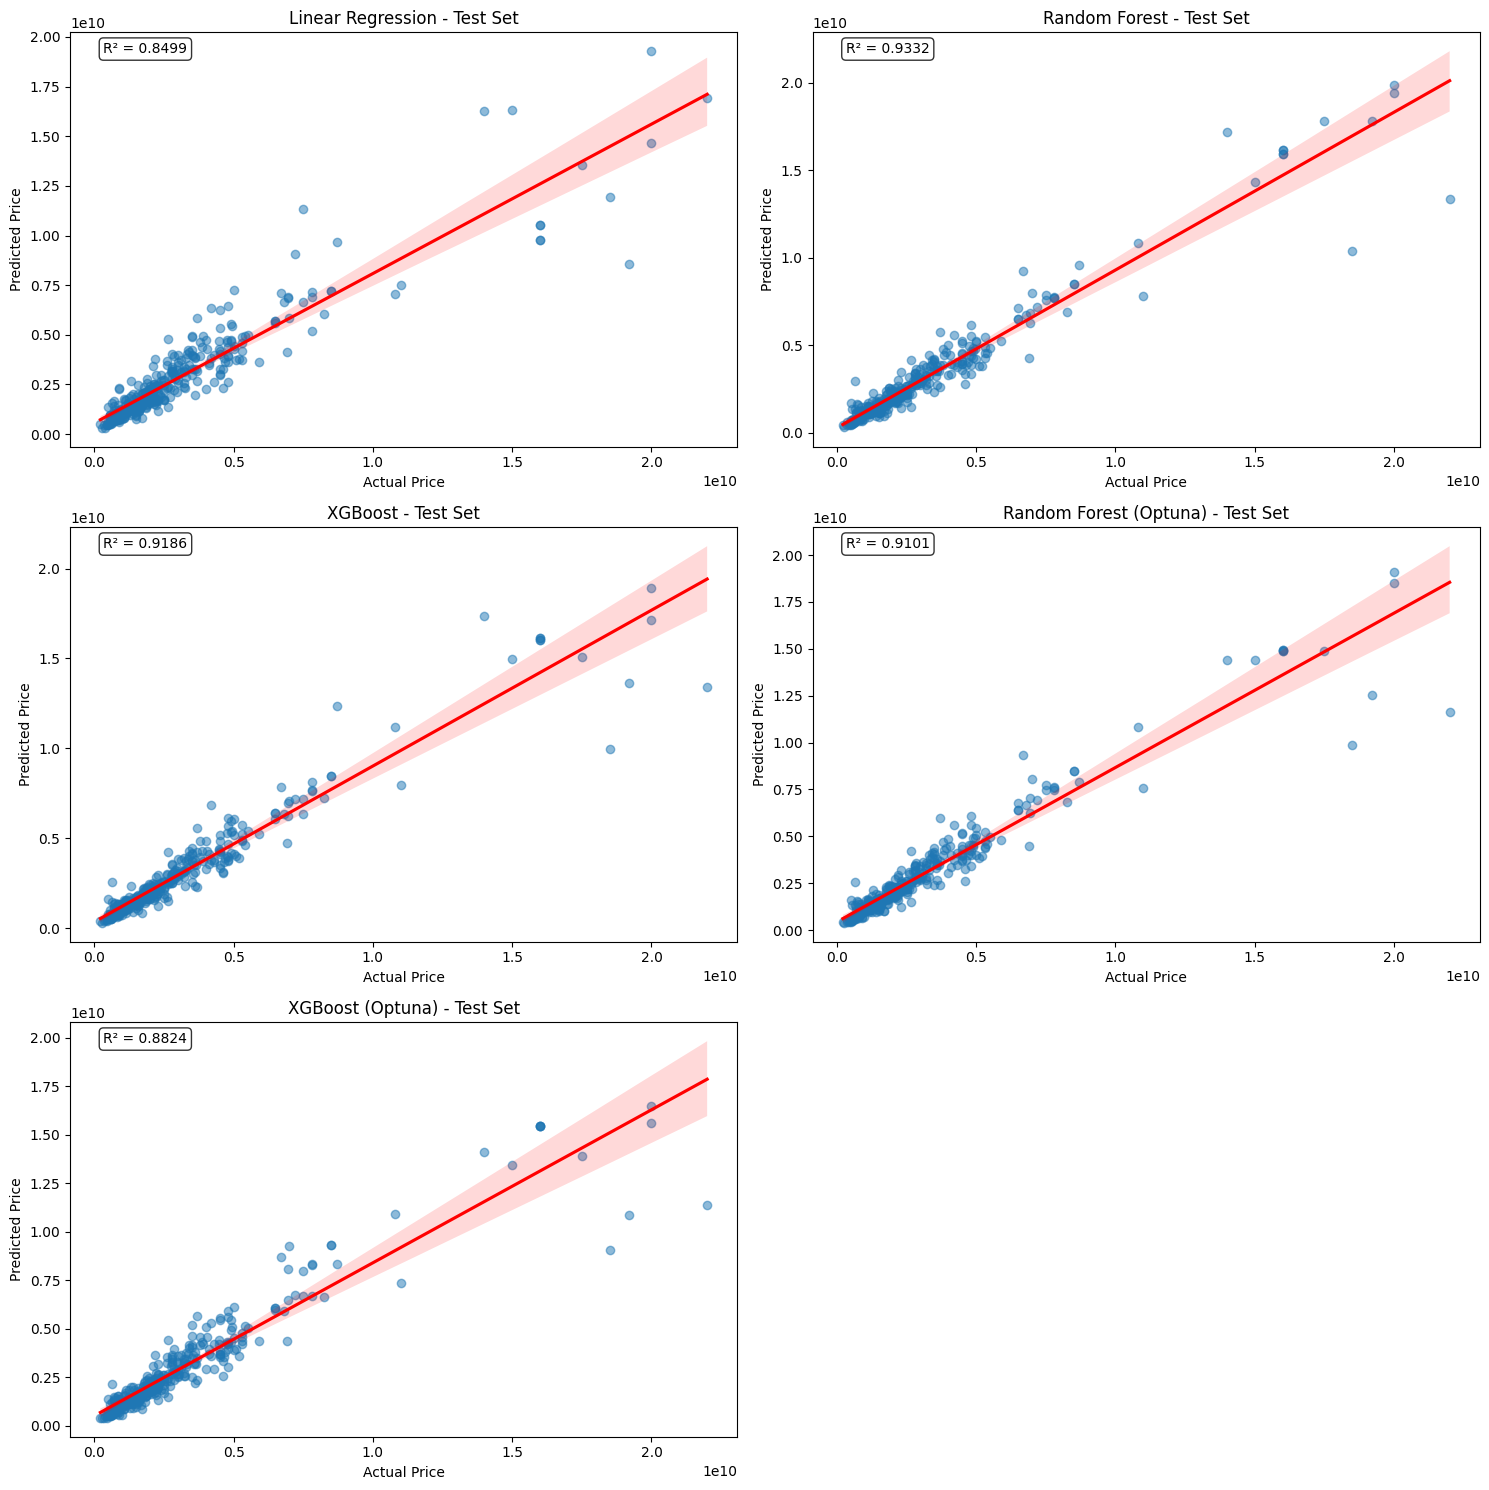

Displaying sample predictions...

📋 SAMPLE PREDICTIONS - TRAIN SET:


,Actual_Train,Predicted_Linear Regression,Difference_Linear Regression
4766,"880,000,000","3,652,176,446","2,772,176,446"
2378,"2,800,000,000","3,452,805,906","652,805,906"
4477,"750,000,000","898,972,528","148,972,528"
536,"1,400,000,000","1,213,468,848","-186,531,152"
2522,"2,970,000,000","3,573,845,266","603,845,266"



📋 SAMPLE PREDICTIONS - VALIDATION SET:


,Actual_Validation,Predicted_Linear Regression,Difference_Linear Regression
4766,"880,000,000","3,698,009,453","2,818,009,453"
2378,"2,800,000,000","3,346,879,524","546,879,524"
4477,"750,000,000","903,220,058","153,220,058"
536,"1,400,000,000","1,177,519,947","-222,480,053"
2522,"2,970,000,000","3,568,239,982","598,239,982"



📋 SAMPLE PREDICTIONS - TEST SET:


,Actual_Test,Predicted_Linear Regression,Difference_Linear Regression
3513,"4,600,000,000","3,272,135,031","-1,327,864,969"
663,"1,500,000,000","1,860,344,336","360,344,336"
4157,"6,950,000,000","6,905,083,525","-44,916,475"
1214,"1,880,000,000","2,162,109,399","282,109,399"
3496,"4,500,000,000","3,044,583,019","-1,455,416,981"


In [33]:
# === PREDICTION ANALYSIS ===
print("\n🔍 PREDICTION ANALYSIS")
print("=" * 50)

# 1. Plot predictions for all sets
print("Plotting prediction comparisons...")
evaluator.plot_predictions_comparison(all_metrics, y_train, y_test, 'train')
evaluator.plot_predictions_comparison(all_metrics, y_train, y_test, 'validation')
evaluator.plot_predictions_comparison(all_metrics, y_train, y_test, 'test')

# 2. Show sample predictions
print("Displaying sample predictions...")
prediction_samples = evaluator.create_prediction_samples(all_metrics, y_train, y_test, n_samples=5)

print("\n📋 SAMPLE PREDICTIONS - TRAIN SET:")
display(prediction_samples[all_metrics[0]['Model']]['train'].style.format('{:,.0f}'))

print("\n📋 SAMPLE PREDICTIONS - VALIDATION SET:")
display(prediction_samples[all_metrics[0]['Model']]['validation'].style.format('{:,.0f}'))

print("\n📋 SAMPLE PREDICTIONS - TEST SET:")
display(prediction_samples[all_metrics[0]['Model']]['test'].style.format('{:,.0f}'))

In [34]:
# === MODEL COMPARISON SUMMARY ===
print("\n🏆 MODEL COMPARISON SUMMARY")
print("=" * 50)

# Extract test metrics for easy comparison
test_comparison = []
for metrics in all_metrics:
    test_comparison.append({
        'Model': metrics['Model'],
        'Test_R2': metrics['Test_R2'],
        'Test_RMSE': metrics['Test_RMSE'],
        'Test_MAPE': metrics['Test_MAPE']
    })

test_df = pd.DataFrame(test_comparison)
test_df = test_df.sort_values('Test_R2', ascending=False)

print("Models ranked by Test R² score:")
display(test_df.style.format({
    'Test_R2': '{:.4f}',
    'Test_RMSE': '{:.4f}',
    'Test_MAPE': '{:.4f}'
}))


🏆 MODEL COMPARISON SUMMARY
Models ranked by Test R² score:


,Model,Test_R2,Test_RMSE,Test_MAPE
2,XGBoost,0.9246,0.2240,0.0071
1,Random Forest,0.9180,0.2336,0.0072
3,Random Forest (Optuna),0.9177,0.2340,0.0075
4,XGBoost (Optuna),0.9072,0.2484,0.0085
0,Linear Regression,0.8830,0.2790,0.0099


In [35]:
# === BEST MODEL IDENTIFICATION ===
print("\n⭐ BEST MODEL IDENTIFICATION")
print("=" * 50)

best_model_metrics = max(all_metrics, key=lambda x: x['Test_R2'])
print(f"🏆 Best Model: {best_model_metrics['Model']}")
print(f"   Test R²: {best_model_metrics['Test_R2']:.4f}")
print(f"   Test RMSE: {best_model_metrics['Test_RMSE']:.4f}")
print(f"   Test MAPE: {best_model_metrics['Test_MAPE']:.4f}")


⭐ BEST MODEL IDENTIFICATION
🏆 Best Model: XGBoost
   Test R²: 0.9246
   Test RMSE: 0.2240
   Test MAPE: 0.0071


In [36]:
a

NameError: name 'a' is not defined

In [ ]:
# Inisialisasi model Linear Regression
lr = LinearRegression()

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definisikan metrik
rmse_scorer = make_scorer(lambda y_true, y_pred: root_mean_squared_error(y_true, y_pred), greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Lakukan cross-validation
mean_cv_r2_lr_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')
mean_cv_rmse_lr_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring=rmse_scorer)
mean_cv_mape_lr_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring=mape_scorer)

# Tampilkan hasil rata-rata cross-validation
print("Cross validation score on base Multiple Linear Regression:")
print(f"Mean CV R²: {np.mean(mean_cv_r2_lr_scores):.4f}")
print(f"Mean CV RMSE: {np.abs(np.mean(mean_cv_rmse_lr_scores)):.4f}")  # RMSE negatif diubah ke positif
print(f"Mean CV MAPE: {np.abs(np.mean(mean_cv_mape_lr_scores)):.4f}")

# **Latih ulang model pada seluruh data pelatihan setelah cross-validation**
lr.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_lr_train = lr.predict(X_train)

# Menghitung metrik pada data uji
train_r2_base_lr = r2_score(y_train, y_pred_lr_train)
train_rmse_base_lr = root_mean_squared_error(y_train, y_pred_lr_train)
train_mape_base_lr = mean_absolute_percentage_error(y_train, y_pred_lr_train)

# Melakukan prediksi pada data uji
y_pred_lr = lr.predict(X_test)

# Menghitung metrik pada data uji
test_r2_base_lr = r2_score(y_test, y_pred_lr)
test_rmse_base_lr = root_mean_squared_error(y_test, y_pred_lr)
test_mape_base_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("\nMultiple Linear Regression Result:")
print(f"Train R²: {train_r2_base_lr:.4f}")
print(f"Train RMSE: {train_rmse_base_lr:.4f}")
print(f"Train MAPE: {train_mape_base_lr:.4f}")
print(f"\nTest R²: {test_r2_base_lr:.4f}")
print(f"Test RMSE: {test_rmse_base_lr:.4f}")
print(f"Test MAPE: {test_mape_base_lr:.4f}")

Cross validation score on base Multiple Linear Regression:
Mean CV R²: 0.8646
Mean CV RMSE: 0.2901
Mean CV MAPE: 0.0102

Multiple Linear Regression Result:
Train R²: 0.8778
Train RMSE: 0.2761
Train MAPE: 0.0098

Test R²: 0.8830
Test RMSE: 0.2790
Test MAPE: 0.0099


Base Model Random Forest

In [ ]:
# Inisialisasi model
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation otomatis
r2_scores = cross_val_score(rfr, X_train, y_train, cv=kf, scoring="r2")
rmse_scores = np.sqrt(-cross_val_score(rfr, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"))
mape_scores = cross_val_score(rfr, X_train, y_train, cv=kf, scoring="neg_mean_absolute_percentage_error") * -1

# Menghitung rata-rata metrik dari cross-validation
mean_r2_base_rfr = np.mean(r2_scores)
mean_rmse_base_rfr = np.mean(rmse_scores)
mean_mape_base_rfr = np.mean(mape_scores)

print("Cross-validation score on base Random Forest:")
print(f"Mean CV R²: {mean_r2_base_rfr:.4f}")
print(f"Mean CV RMSE: {mean_rmse_base_rfr:.4f}")
print(f"Mean CV MAPE: {mean_mape_base_rfr:.4f}")

# Melatih model pada seluruh data pelatihan
rfr.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_rf_train = rfr.predict(X_train)

# Menghitung metrik pada data latih
train_r2_base_rfr = r2_score(y_train, y_pred_rf_train)
train_rmse_base_rfr = root_mean_squared_error(y_train, y_pred_rf_train)
train_mape_base_rfr = mean_absolute_percentage_error(y_train, y_pred_rf_train)

# Melakukan prediksi pada data uji
y_pred_rf = rfr.predict(X_test)

# Menghitung metrik pada data uji
test_r2_base_rfr = r2_score(y_test, y_pred_rf)
test_rmse_base_rfr = root_mean_squared_error(y_test, y_pred_rf)
test_mape_base_rfr = mean_absolute_percentage_error(y_test, y_pred_rf)

print("\nBase Random Forest Result:")
print(f"Train R²: {train_r2_base_rfr:.4f}")
print(f"Train RMSE: {train_rmse_base_rfr:.4f}")
print(f"Train MAPE: {train_mape_base_rfr:.4f}\n")
print(f"Test R²: {test_r2_base_rfr:.4f}")
print(f"Test RMSE: {test_rmse_base_rfr:.4f}")
print(f"Test MAPE: {test_mape_base_rfr:.4f}")

Cross-validation score on base Random Forest:
Mean CV R²: 0.8872
Mean CV RMSE: 0.2646
Mean CV MAPE: 0.0084

Base Random Forest Result:
Train R²: 0.9858
Train RMSE: 0.0941
Train MAPE: 0.0030

Test R²: 0.9180
Test RMSE: 0.2336
Test MAPE: 0.0072


Base Model XGBoost

In [ ]:
# Inisialisasi model
xgb = XGBRegressor(verbosity=0, n_jobs=-1, random_state=42)

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation otomatis
r2_scores = cross_val_score(xgb, X_train, y_train, cv=kf, scoring="r2")
rmse_scores = np.sqrt(-cross_val_score(xgb, X_train, y_train, cv=kf, scoring="neg_mean_squared_error"))
mape_scores = cross_val_score(xgb, X_train, y_train, cv=kf, scoring="neg_mean_absolute_percentage_error") * -1

# Menghitung rata-rata metrik dari cross-validation
mean_r2_base_xgb = np.mean(r2_scores)
mean_rmse_base_xgb = np.mean(rmse_scores)
mean_mape_base_xgb = np.mean(mape_scores)

print("Cross-validation score on base XGBoost:")
print(f"Mean CV R²: {mean_r2_base_xgb:.4f}")
print(f"Mean CV RMSE: {mean_rmse_base_xgb:.4f}")
print(f"Mean CV MAPE: {mean_mape_base_xgb:.4f}")

# Melatih model pada seluruh data pelatihan
xgb.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_xgb_train = xgb.predict(X_train)

# Menghitung metrik pada data latih
train_r2_base_xgb = r2_score(y_train, y_pred_xgb_train)
train_rmse_base_xgb = root_mean_squared_error(y_train, y_pred_xgb_train)
train_mape_base_xgb = mean_absolute_percentage_error(y_train, y_pred_xgb_train)

# Melakukan prediksi pada data uji
y_pred_xgb = xgb.predict(X_test)

# Menghitung metrik pada data uji
test_r2_base_xgb = r2_score(y_test, y_pred_xgb)
test_rmse_base_xgb = root_mean_squared_error(y_test, y_pred_xgb)
test_mape_base_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\nBase XGBoost Result:")
print(f"Train R²: {train_r2_base_xgb:.4f}")
print(f"Train RMSE: {train_rmse_base_xgb:.4f}")
print(f"Train MAPE: {train_mape_base_xgb:.4f}\n")
print(f"Test R²: {test_r2_base_xgb:.4f}")
print(f"Test RMSE: {test_rmse_base_xgb:.4f}")
print(f"Test MAPE: {test_mape_base_xgb:.4f}")

Cross-validation score on base XGBoost:
Mean CV R²: 0.8881
Mean CV RMSE: 0.2636
Mean CV MAPE: 0.0085

Base XGBoost Result:
Train R²: 0.9905
Train RMSE: 0.0770
Train MAPE: 0.0025

Test R²: 0.9246
Test RMSE: 0.2240
Test MAPE: 0.0071


Random Forest dengan Optuna

In [ ]:
# Fungsi Optuna untuk tuning Random Forest
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1200, 2000, step=100),
        "max_depth": trial.suggest_int("max_depth", 20, 50, step=5),
        "min_samples_split": trial.suggest_int("min_samples_split", 4, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_float("max_features", 0.4, 0.7),
        "bootstrap": True,
        "max_samples": trial.suggest_float("max_samples", 0.8, 0.95),
        "ccp_alpha": trial.suggest_float("ccp_alpha", 0.0, 0.005),
        "warm_start": True,
        "oob_score": True
    }

    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)

    # Gunakan 5-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluasi dengan cross_val_score menggunakan 5-Fold CV
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    rmse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    mape_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)

    # Simpan hasil cross-validation
    global mean_cv_r2_opt_rfr, mean_cv_rmse_opt_rfr, mean_cv_mape_opt_rfr
    mean_cv_r2_opt_rfr = np.mean(r2_scores)
    mean_cv_rmse_opt_rfr = np.mean(rmse_scores)
    mean_cv_mape_opt_rfr = np.mean(mape_scores)

    return mean_cv_r2_opt_rfr  # Ambil rata-rata R² sebagai metric utama

# Jalankan Optuna
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective, n_trials=100)

# Print hasil tuning terbaik
print("Best hyperparameters for Random Forest:", study_rf.best_params)

# Latih model final dengan hyperparameter terbaik
best_params_rf = study_rf.best_params
final_rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
final_rf.fit(X_train, y_train)

# Evaluasi model di data latih
y_pred_opt_rf_train = final_rf.predict(X_train)
train_rmse_opt_rfr = root_mean_squared_error(y_train, y_pred_opt_rf_train)
train_r2_opt_rfr = r2_score(y_train, y_pred_opt_rf_train)
train_mape_opt_rfr = mean_absolute_percentage_error(y_train, y_pred_opt_rf_train)

# Evaluasi model di data uji
y_pred_opt_rf = final_rf.predict(X_test)
test_rmse_opt_rfr = root_mean_squared_error(y_test, y_pred_opt_rf)
test_r2_opt_rfr = r2_score(y_test, y_pred_opt_rf)
test_mape_opt_rfr = mean_absolute_percentage_error(y_test, y_pred_opt_rf)

print("\nRandom Forest Optuna Result:")
print("\nCross-validation score:")
print(f"Mean CV R²: {mean_cv_r2_opt_rfr:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse_opt_rfr:.4f}")
print(f"Mean CV MAPE: {mean_cv_mape_opt_rfr:.4f}\n")
print(f"Train R²: {train_r2_opt_rfr:.4f}")
print(f"Train RMSE: {train_rmse_opt_rfr:.4f}")
print(f"Train MAPE: {train_mape_opt_rfr:.4f}\n")
print(f"Test R²: {test_r2_opt_rfr:.4f}")
print(f"Test RMSE: {test_rmse_opt_rfr:.4f}")
print(f"Test MAPE: {test_mape_opt_rfr:.4f}")

[I 2025-09-29 11:28:40,775] A new study created in memory with name: no-name-dc223094-2a70-4ec0-8ae8-4a3c42c90901
[I 2025-09-29 11:29:03,060] Trial 0 finished with value: 0.8532019229584137 and parameters: {'n_estimators': 1700, 'max_depth': 35, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.6369750241133091, 'max_samples': 0.9264868666518972, 'ccp_alpha': 0.0027923889969495254}. Best is trial 0 with value: 0.8532019229584137.
[I 2025-09-29 11:29:14,063] Trial 1 finished with value: 0.8810321493153118 and parameters: {'n_estimators': 1200, 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 0.4283708198410835, 'max_samples': 0.8370864145901631, 'ccp_alpha': 0.00025391897286097196}. Best is trial 1 with value: 0.8810321493153118.
[I 2025-09-29 11:29:26,350] Trial 2 finished with value: 0.8380729573030992 and parameters: {'n_estimators': 1700, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 0.5236266570665451

Best hyperparameters for Random Forest: {'n_estimators': 1200, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.47617779609936284, 'max_samples': 0.9417919374261052, 'ccp_alpha': 6.95803316481637e-06}

Random Forest Optuna Result:

Cross-validation score:
Mean CV R²: 0.8427
Mean CV RMSE: 0.3125
Mean CV MAPE: 0.0111

Train R²: 0.9773
Train RMSE: 0.1191
Train MAPE: 0.0040

Test R²: 0.9182
Test RMSE: 0.2333
Test MAPE: 0.0075


XGBoost dengan Optuna

In [ ]:
# Definisikan fungsi tujuan untuk Optuna
def objective(trial):
    # Hyperparameter yang akan dioptimalkan
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1200, 2500, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03, log=True),
        "max_depth": trial.suggest_int("max_depth", 4, 7),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 6),
        "subsample": trial.suggest_float("subsample", 0.85, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.75, 0.95),
        "gamma": trial.suggest_float("gamma", 0.1, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 1, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 5)
    }

    # Inisialisasi model XGBoost
    model = XGBRegressor(**params, random_state=42, n_jobs=-1)

    # Evaluasi dengan cross_val_score menggunakan 5-Fold CV
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    rmse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    mape_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)

    # Simpan hasil cross-validation
    global mean_cv_r2_opt_xgb, mean_cv_rmse_opt_xgb, mean_cv_mape_opt_xgb
    mean_cv_r2_opt_xgb = np.mean(r2_scores)
    mean_cv_rmse_opt_xgb = np.mean(rmse_scores)
    mean_cv_mape_opt_xgb = np.mean(mape_scores)

    return mean_cv_r2_opt_xgb  # Mengembalikan rata-rata R² sebagai nilai yang akan dioptimalkan

# Tuning hyperparameter dengan Optuna
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=100)

# Menampilkan hyperparameter terbaik
print("Best hyperparameters: ", study_xgb.best_params)

# Melatih model dengan hyperparameter terbaik
best_params = study_xgb.best_params
best_model_xgb = XGBRegressor(**best_params, random_state=42, n_jobs=-1)
best_model_xgb.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_opt_xgb_train = best_model_xgb.predict(X_train)

# Menghitung metrik pada data latih
train_r2_opt_xgb = r2_score(y_train, y_pred_opt_xgb_train)
train_rmse_opt_xgb = root_mean_squared_error(y_train, y_pred_opt_xgb_train)
train_mape_opt_xgb = mean_absolute_percentage_error(y_train, y_pred_opt_xgb_train)

# Melakukan prediksi pada data uji
y_pred_opt_xgb = best_model_xgb.predict(X_test)

# Menghitung metrik pada data uji
test_r2_opt_xgb = r2_score(y_test, y_pred_opt_xgb)
test_rmse_opt_xgb = root_mean_squared_error(y_test, y_pred_opt_xgb)
test_mape_opt_xgb = mean_absolute_percentage_error(y_test, y_pred_opt_xgb)

print("\nXGBoost Optuna Result:")
print("\nCross-validation score:")
print(f"Mean CV R²: {mean_cv_r2_opt_xgb:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse_opt_xgb:.4f}")
print(f"Mean CV MAPE: {mean_cv_mape_opt_xgb:.4f}\n")
print(f"Train R²: {train_r2_opt_xgb:.4f}")
print(f"Train RMSE: {train_rmse_opt_xgb:.4f}")
print(f"Train MAPE: {train_mape_opt_xgb:.4f}\n")
print(f"Test R²: {test_r2_opt_xgb:.4f}")
print(f"Test RMSE: {test_rmse_opt_xgb:.4f}")
print(f"Test MAPE: {test_mape_opt_xgb:.4f}")

[I 2025-09-29 11:51:23,067] A new study created in memory with name: no-name-621a4cc3-144e-4671-9944-0959e2d4c6a7
[I 2025-09-29 11:51:24,938] Trial 0 finished with value: 0.8725784525509424 and parameters: {'n_estimators': 1700, 'learning_rate': 0.013330851930419779, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.9960948861741484, 'colsample_bytree': 0.8495417172885277, 'gamma': 1.3130146600178159, 'reg_alpha': 2.1823354507624453, 'reg_lambda': 4.742885293098558}. Best is trial 0 with value: 0.8725784525509424.
[I 2025-09-29 11:51:26,248] Trial 1 finished with value: 0.8548345356351239 and parameters: {'n_estimators': 1300, 'learning_rate': 0.023454113345966466, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.9375395129584195, 'colsample_bytree': 0.8650223500425531, 'gamma': 2.8870224247834138, 'reg_alpha': 4.342339013143145, 'reg_lambda': 4.431090908078516}. Best is trial 0 with value: 0.8725784525509424.
[I 2025-09-29 11:51:27,627] Trial 2 finished with value: 0.87093331

Best hyperparameters:  {'n_estimators': 1800, 'learning_rate': 0.014637705905603277, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.8732903031807491, 'colsample_bytree': 0.9111392889872022, 'gamma': 0.10112728584007395, 'reg_alpha': 1.2669324197443288, 'reg_lambda': 3.266297307035436}

XGBoost Optuna Result:

Cross-validation score:
Mean CV R²: 0.8930
Mean CV RMSE: 0.2575
Mean CV MAPE: 0.0090

Train R²: 0.9303
Train RMSE: 0.2086
Train MAPE: 0.0072

Test R²: 0.9108
Test RMSE: 0.2436
Test MAPE: 0.0083


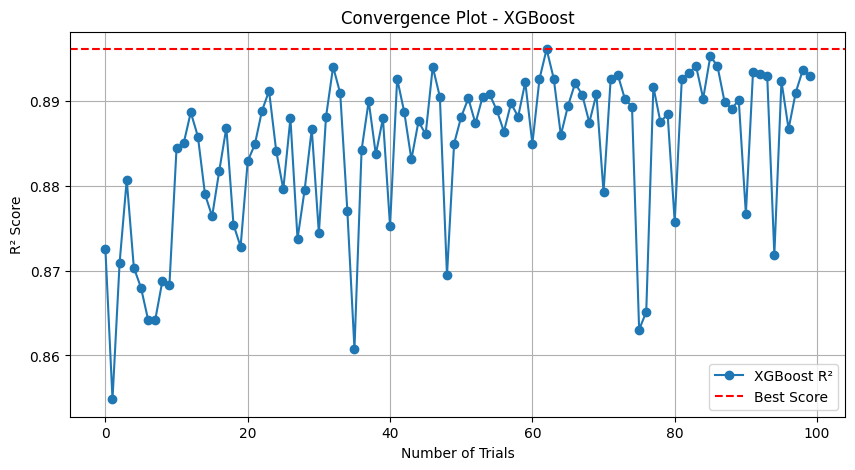

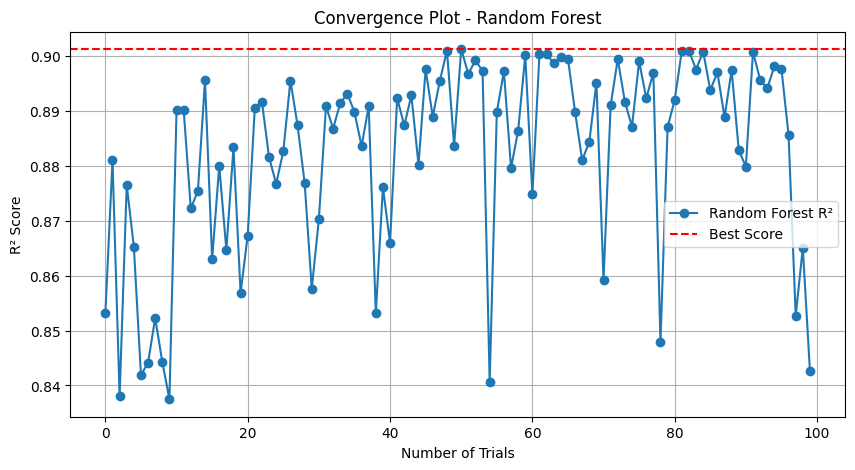

In [ ]:
# Function to display convergence plot
def plot_convergence(study, model_name):
    trials = study.trials_dataframe()
    
    plt.figure(figsize=(10, 5))
    plt.plot(trials["number"], trials["value"], marker="o", linestyle="-", label=f"{model_name} R²")
    plt.axhline(y=max(trials["value"]), color="r", linestyle="--", label="Best Score")
    
    plt.xlabel("Number of Trials")
    plt.ylabel("R² Score")
    plt.title(f"Convergence Plot - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Displaying plots for XGBoost and Random Forest
plot_convergence(study_xgb, "XGBoost")
plot_convergence(study_rf, "Random Forest")

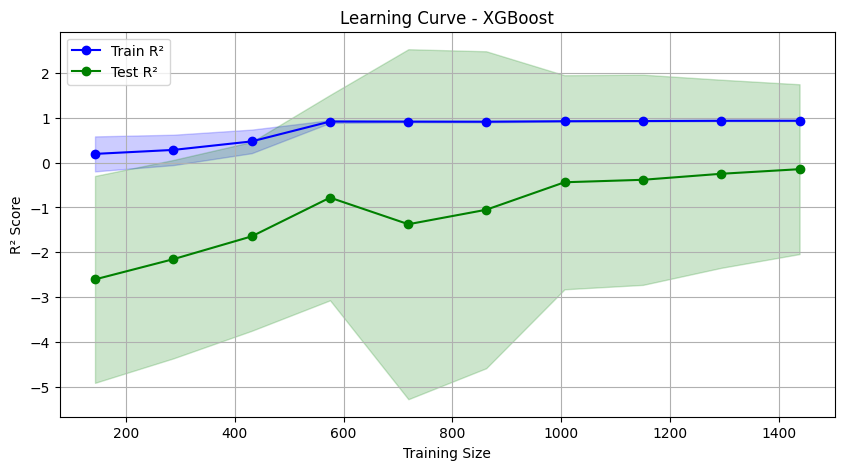

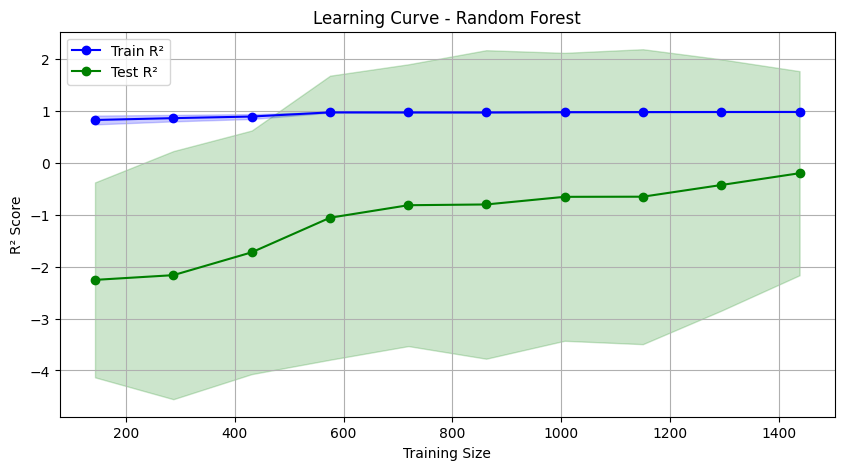

In [ ]:
# Create learning curve plot for random forest optuna-tuned and XGBoost Optuna-tuned
def plot_learning_curve(model, X, y, model_name):
    """Plot Learning Curve (Train vs Test)"""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(train_sizes, train_mean, label="Train R²", marker="o", color="blue")
    plt.plot(train_sizes, test_mean, label="Test R²", marker="o", color="green")
    
    plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1), 
                     train_mean + np.std(train_scores, axis=1), color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1), 
                     test_mean + np.std(test_scores, axis=1), color="green", alpha=0.2)
    
    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.title(f"Learning Curve - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Use the best model from Optuna
best_xgb = XGBRegressor(**study_xgb.best_params, random_state=42)
best_rf = RandomForestRegressor(**study_rf.best_params, random_state=42, n_jobs=-1)

# Plot Learning Curve
plot_learning_curve(best_xgb, X, y, "XGBoost")
plot_learning_curve(best_rf, X, y, "Random Forest")


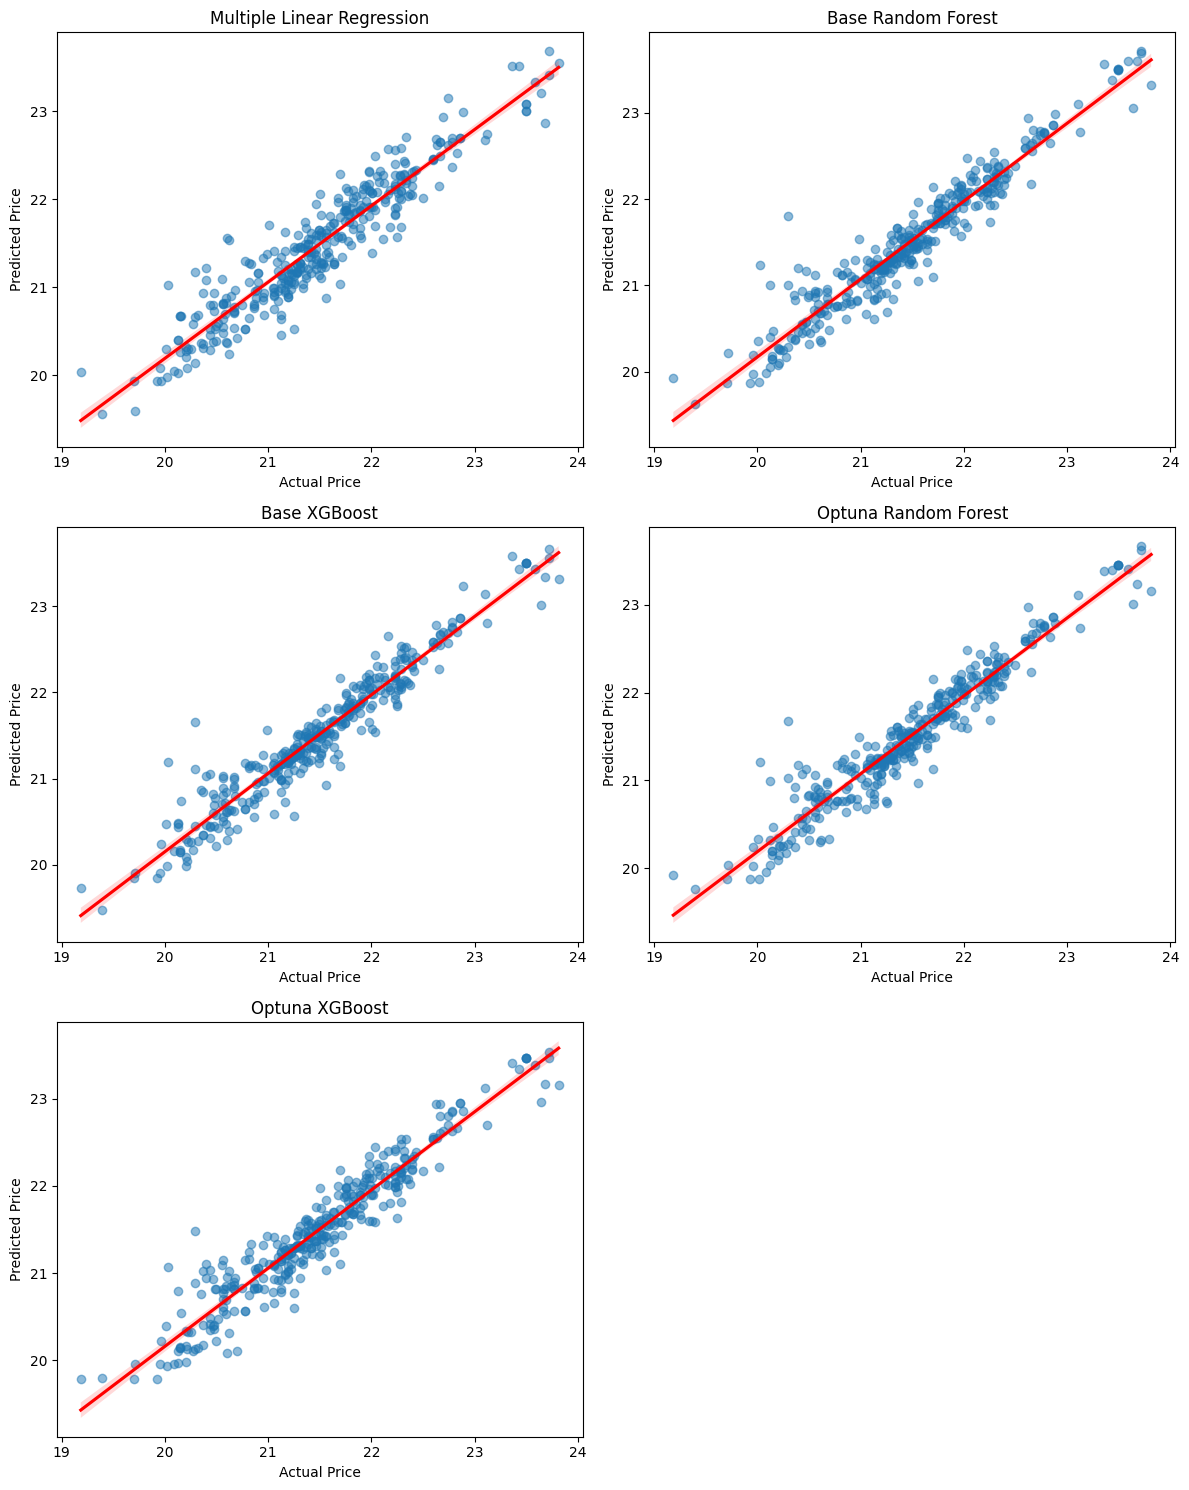

In [ ]:
# Create figures and axes for a 3x2 grid (since there are 5 models, one slot will be empty)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot for Multiple Linear Regression
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0, 0])
axes[0, 0].set_title('Multiple Linear Regression')
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')

# Plot for Random Forest Base
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0, 1])
axes[0, 1].set_title('Base Random Forest')
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')

# Plot for XGBoost Base
sns.regplot(x=y_test, y=y_pred_xgb, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[1, 0])
axes[1, 0].set_title('Base XGBoost')
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')

# Plot for Optuna Random Forest
sns.regplot(x=y_test, y=y_pred_opt_rf, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[1, 1])
axes[1, 1].set_title('Optuna Random Forest')
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')

# Plot for Optuna XGBoost
sns.regplot(x=y_test, y=y_pred_opt_xgb, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[2, 0])
axes[2, 0].set_title('Optuna XGBoost')
axes[2, 0].set_xlabel('Actual Price')
axes[2, 0].set_ylabel('Predicted Price')

# Remove empty subplot (axes[2,1])
fig.delaxes(axes[2, 1])

# Arrange the layout so that it does not collide
plt.tight_layout()
plt.show()

In [ ]:
# Organize the predictions results into a dictionary
model_predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Random Forest (Optuna)': y_pred_opt_rf,
    'XGBoost (Optuna)': y_pred_opt_xgb
}

# Inverse transform the results to the actual values (only once)
y_test_actual = np.expm1(y_test)

# Build a single, consolidated DataFrame for comparison
comparison_dict = {'Actual': y_test_actual}

for name, pred_log in model_predictions.items():
    pred_actual = np.expm1(pred_log)
    comparison_dict[f'Predicted ({name})'] = pred_actual
    comparison_dict[f'Difference ({name})'] = pred_actual - y_test_actual

df_comparison = pd.DataFrame(comparison_dict)

# Display the first 5 rows with nice formatting
display(df_comparison.head(5).style.format('{:,.0f}'))

,Actual,Predicted (Linear Regression),Difference (Linear Regression),Predicted (Random Forest),Difference (Random Forest),Predicted (XGBoost),Difference (XGBoost),Predicted (Random Forest (Optuna)),Difference (Random Forest (Optuna)),Predicted (XGBoost (Optuna)),Difference (XGBoost (Optuna))
3513,"4,600,000,000","3,272,135,031","-1,327,864,969","3,347,585,527","-1,252,414,473","3,131,149,312","-1,468,850,688","3,314,013,032","-1,285,986,968","3,326,530,560","-1,273,469,440"
663,"1,500,000,000","1,860,344,336","360,344,336","895,751,769","-604,248,231","1,308,879,616","-191,120,384","1,240,939,425","-259,060,575","1,510,640,256","10,640,256"
4157,"6,950,000,000","6,905,083,525","-44,916,475","6,290,204,981","-659,795,019","6,250,821,632","-699,178,368","6,244,246,743","-705,753,257","6,545,646,592","-404,353,408"
1214,"1,880,000,000","2,162,109,399","282,109,399","2,574,020,445","694,020,445","2,160,856,576","280,856,576","2,416,167,769","536,167,769","2,103,088,640","223,088,640"
3496,"4,500,000,000","3,044,583,019","-1,455,416,981","3,903,115,725","-596,884,275","3,326,187,776","-1,173,812,224","3,728,271,604","-771,728,396","3,751,113,728","-748,886,272"


#### Overall Evaluation

In [ ]:
df_eval_test = pd.DataFrame(data={
    'Model' : ['Multiple Linear Regression', 'Base Random Forest', 'Base XGBoost', 'Optuna Random Forest', 'Optuna XGBoost'],
    'R-squared' : [test_r2_base_lr, test_r2_base_rfr, test_r2_base_xgb, test_r2_opt_rfr, test_r2_opt_xgb],
    'RMSE' : [test_rmse_base_lr, test_rmse_base_rfr, test_rmse_base_xgb, test_rmse_opt_rfr, test_rmse_opt_xgb],
    'MAPE' : [test_mape_base_lr, test_mape_base_rfr, test_mape_base_xgb, test_mape_opt_rfr, test_mape_opt_xgb]
})

df_eval_train = pd.DataFrame(data={
    'Model' : ['Multiple Linear Regression', 'Base Random Forest', 'Base XGBoost', 'Optuna Random Forest', 'Optuna XGBoost'],
    'R-squared' : [train_r2_base_lr, train_r2_base_rfr, train_r2_base_xgb, train_r2_opt_rfr, train_r2_opt_xgb],
    'RMSE' : [train_rmse_base_lr, train_rmse_base_rfr, train_rmse_base_xgb, train_rmse_opt_rfr, train_rmse_opt_xgb],
    'MAPE' : [train_mape_base_lr, train_mape_base_rfr, train_mape_base_xgb, train_mape_opt_rfr, train_mape_opt_xgb]
})

for column in ['R-squared', 'RMSE', 'MAPE']:
    df_eval_test[column] = df_eval_test[column].map(lambda x: f"{x:.4f}")
    df_eval_train[column] = df_eval_train[column].map(lambda x: f"{x:.4f}")

print("Perbandingan akurasi di train set:\n")
df_eval_train

Perbandingan akurasi di train set:



,Model,R-squared,RMSE,MAPE
0,Multiple Linear Regression,0.8778,0.2761,0.0098
1,Base Random Forest,0.9858,0.0941,0.0030
2,Base XGBoost,0.9905,0.0770,0.0025
3,Optuna Random Forest,0.9773,0.1191,0.0040
4,Optuna XGBoost,0.9303,0.2086,0.0072


In [ ]:
print("Perbandingan akurasi di test set:\n")
df_eval_test

Perbandingan akurasi di test set:



,Model,R-squared,RMSE,MAPE
0,Multiple Linear Regression,0.8830,0.2790,0.0099
1,Base Random Forest,0.9180,0.2336,0.0072
2,Base XGBoost,0.9246,0.2240,0.0071
3,Optuna Random Forest,0.9182,0.2333,0.0075
4,Optuna XGBoost,0.9108,0.2436,0.0083


In [ ]:
# 1. Organize all results into a single, structured dictionary.
# This is far cleaner than managing many individual variables.
# Note: You'll need to calculate and fill in your validation metrics.
results = {
    'Multiple Linear Regression': {
        'Train': {'R-squared': train_r2_base_lr, 'RMSE': train_rmse_base_lr, 'MAPE': train_mape_base_lr},
        'Validation': {'R-squared': mean_cv_r2_lr_scores, 'RMSE': mean_cv_rmse_lr_scores, 'MAPE': mean_cv_mape_lr_scores},
        'Test': {'R-squared': test_r2_base_lr, 'RMSE': test_rmse_base_lr, 'MAPE': test_mape_base_lr}
    },
    'Base Random Forest': {
        'Train': {'R-squared': train_r2_base_rfr, 'RMSE': train_rmse_base_rfr, 'MAPE': train_mape_base_rfr},
        'Validation': {'R-squared': mean_r2_base_rfr, 'RMSE': mean_rmse_base_rfr, 'MAPE': mean_mape_base_rfr},
        'Test': {'R-squared': test_r2_base_rfr, 'RMSE': test_rmse_base_rfr, 'MAPE': test_mape_base_rfr}
    },
    'Base XGBoost': {
        'Train': {'R-squared': train_r2_base_xgb, 'RMSE': train_rmse_base_xgb, 'MAPE': train_mape_base_xgb},
        'Validation': {'R-squared': mean_r2_base_xgb, 'RMSE': mean_rmse_base_xgb, 'MAPE': val_mape_base_xgb},
        'Test': {'R-squared': test_r2_base_xgb, 'RMSE': test_rmse_base_xgb, 'MAPE': test_mape_base_xgb}
    },
    'Optuna Random Forest': {
        'Train': {'R-squared': train_r2_opt_rfr, 'RMSE': train_rmse_opt_rfr, 'MAPE': train_mape_opt_rfr},
        'Validation': {'R-squared': mean_cv_r2_opt_rfr, 'RMSE': mean_cv_rmse_opt_rfr, 'MAPE': mean_cv_mape_opt_rfr},
        'Test': {'R-squared': test_r2_opt_rfr, 'RMSE': test_rmse_opt_rfr, 'MAPE': test_mape_opt_rfr}
    },
    'Optuna XGBoost': {
        'Train': {'R-squared': train_r2_opt_xgb, 'RMSE': train_rmse_opt_xgb, 'MAPE': train_mape_opt_xgb},
        'Validation': {'R-squared': mean_cv_r2_opt_xgb, 'RMSE': mean_cv_rmse_opt_xgb, 'MAPE': mean_cv_mape_opt_xgb},
        'Test': {'R-squared': test_r2_opt_xgb, 'RMSE': test_rmse_opt_xgb, 'MAPE': test_mape_opt_xgb}
    }
}

# 2. Convert the dictionary into a clean DataFrame.
records = []
for model, data_sets in results.items():
    for set_name, metrics in data_sets.items():
        record = {'Model': model, 'Data Set': set_name, **metrics}
        records.append(record)

df_eval_all = pd.DataFrame(records).set_index(['Model', 'Data Set'])


# 3. Display the single, styled table.
# This formatting doesn't change the underlying data types.
display(
    df_eval_all.style.format('{:.4f}')
               .background_gradient(cmap='viridis', subset=['R-squared'])
)

In [ ]:
# # Simpan model XGBoost Optuna
# with open("../models/xgboost_optuna.pkl", "wb") as f:
#     pickle.dump(best_model_xgb, f)

# # Simpan Ordinal Encoder Daya Listrik
# with open("../models/encoder_data_listrik.pkl", "wb") as f:
#     pickle.dump(watt_enc, f)

# print("Semua objek telah disimpan dalam file .pkl!")